# Project - Bank Marketing Analysis

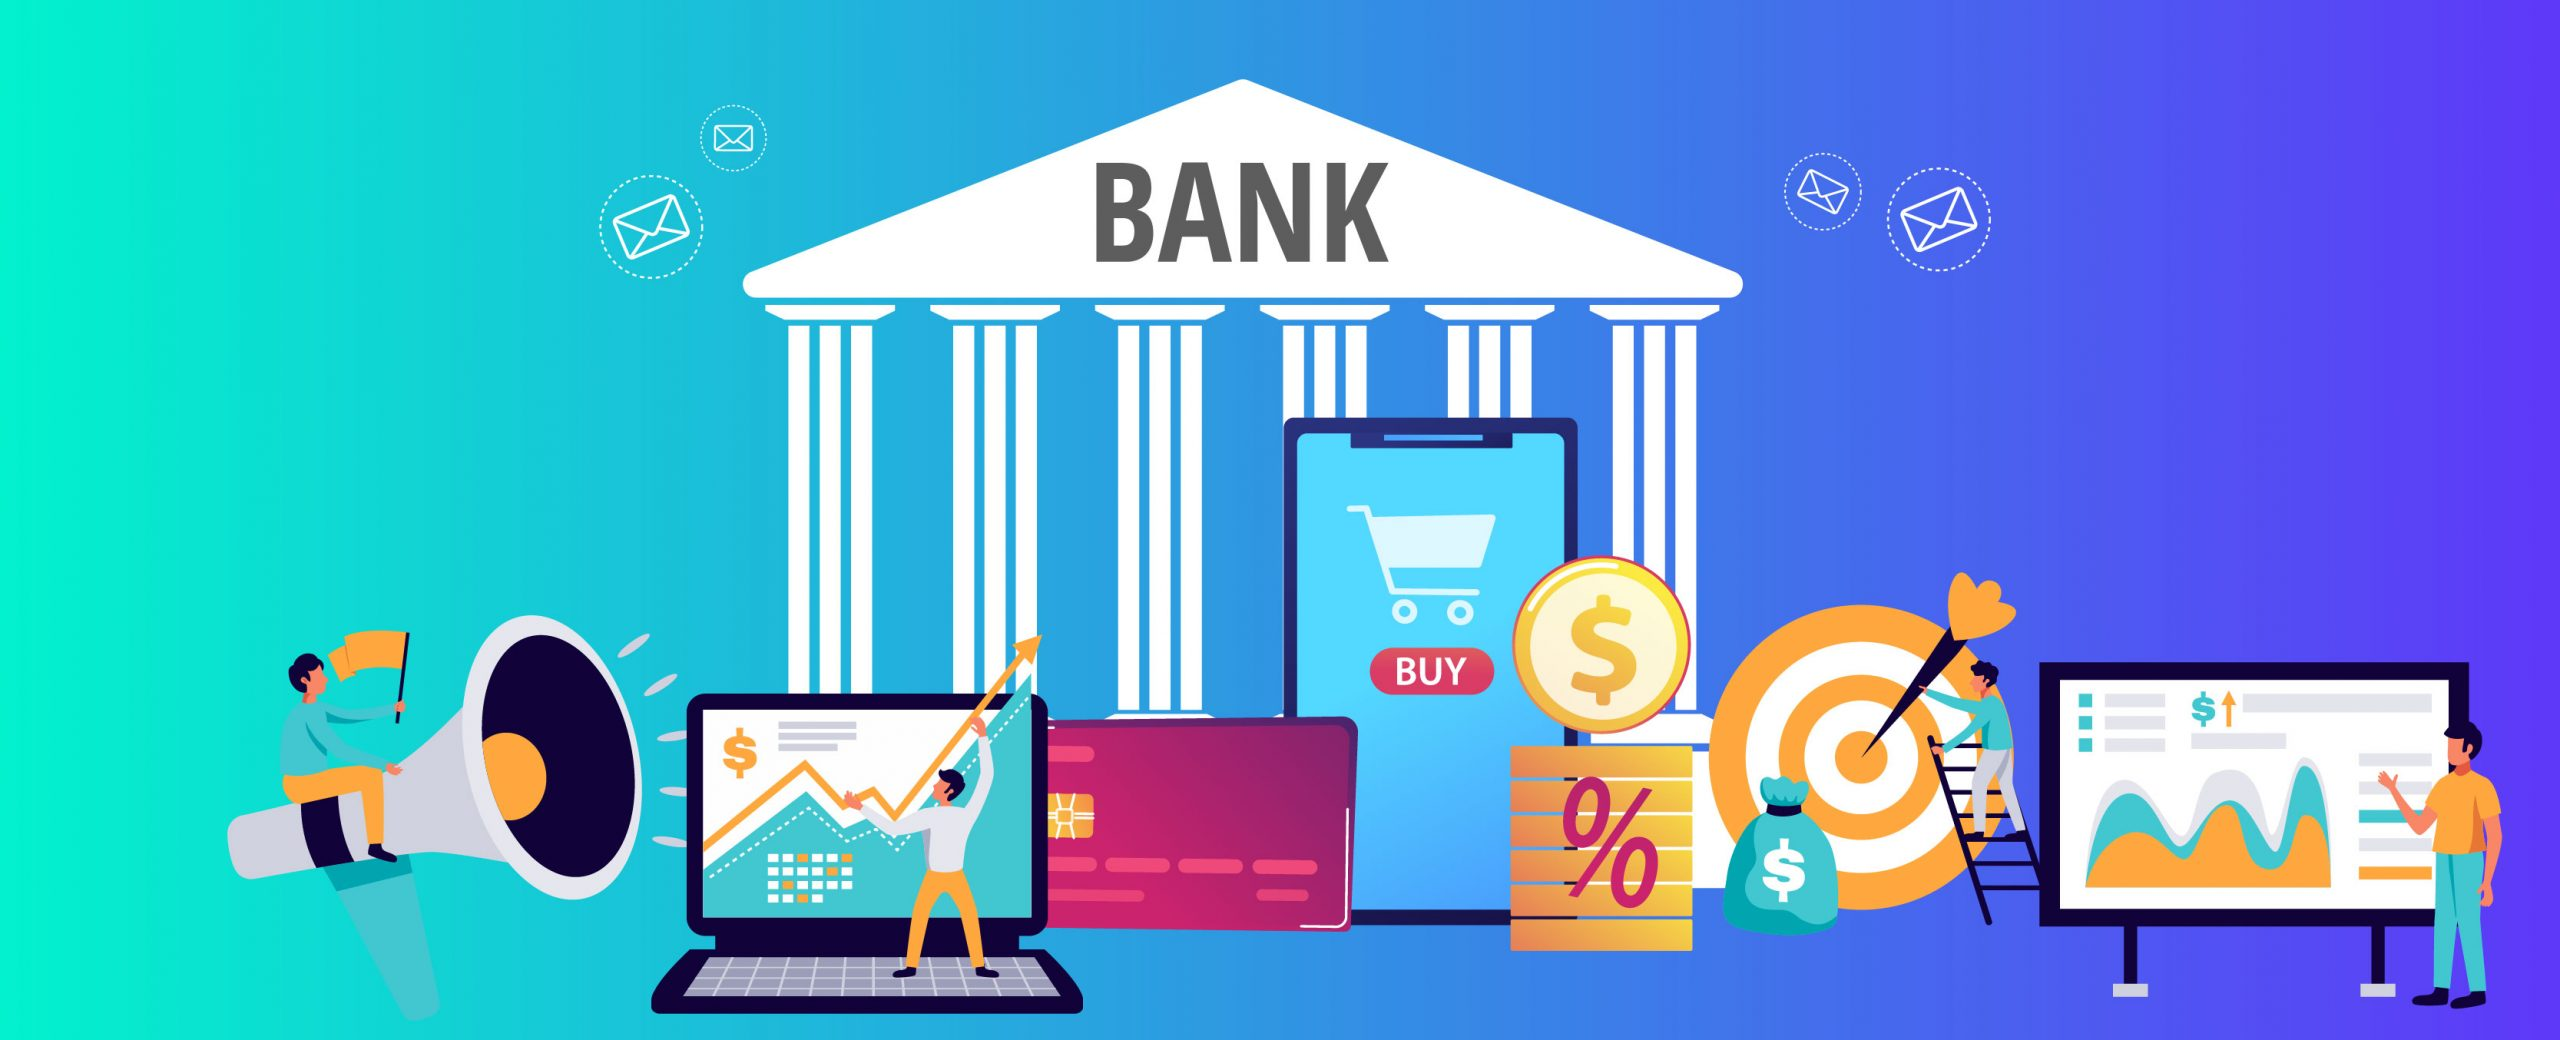

In [1]:
from IPython.display import Image, display

image_path = r'D:\ExcelR Project\Project\1\bank_mrkting.jpg'


image = Image(filename=image_path)

# Display the image
display(image)


## Introduction

The bank provides financial services such as savings accounts, current accounts, debit cards, etc. to its customers. In order to
increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards,
term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns 
need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit.<br></br>
The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.<br></br>
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

## Term deposit

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

## Source

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Variables in dataset

| |  Variables  | Type    |
|---:|:-------------|:-----------|
| 1 | age  | Numeric       | 
| 2 | job  | Categorical   | 
| 3 | marital  | Categorical    | 
| 4 | education  | Categorical    |  
| 5 | default  | Categorical   |  
| 6 | balance  | Numeric    |
| 7 | housing  | Categorical    | 
| 8 | loan  | Categorical    | 
| 9 | contact  | Categorical    | 
| 10 | month  | Categorical    |      
| 11 | day  | Categorical    |
| 12 | duration  | Numeric    | 
| 13 | campaign  | Numeric    | 
| 14 | pdays  | Numeric    | 
| 15 | previous  | Numeric    | 
| 16 | poutcome  | Categorical    |
| 17 | y  | Categorical    | 

## Aim

To do exploratory data analysis(EDA) and visualisation of bank marketing dataset.

Also find out which campaign's performance is better than another.(Effectiveness of Campaign)

# **Pipeline of Bank Marketing Analysis (EDA) :**<br>

* **Basic Exploration**
* **Checking missing values**
* **Distribution of Numerical Variables**
* **Checking Outliers**
* **Checking Skewness**
* **Feature Engineering**
* **Transformation**
* **Distribution of Categorical variables**
* **Categorial vs Numerical variables**
* **Categorical Variables vs y variable¶**
* **Campaign 1 visualisation**
* **Campaign 2 Visualisation**
* **Campaign Performance**
* **Campaign_1_failure and campaign_2_no_response**

### Importing Libraries

In [2]:
# Import Pandas for data analysis
import pandas as pd

# Import Numpy for numerical analysis / calculations
import numpy as np

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Seaborn for data visualization
import seaborn as sns

# To display outpu inline
%matplotlib inline

# To get graphs for missing numbers
import missingno as msno

# For Finding skewness
from scipy.stats import boxcox, skew

# Import Warning library
import warnings
warnings.filterwarnings('ignore')

# Basic Exploration

### Reading Train Data

In [3]:
# Import file and seperate on delimiter
train = pd.read_csv('D:/ExcelR Project/Project/1/train.csv', sep = ';')

In [4]:
# To get number of rows and columns 
train.shape 

(45211, 17)

#### Observation:

* **Number of observations(rows) in train dataset = 45211** <br>
* **Number of variables(columns) in train dataset = 17** 

### Reading test data

In [5]:
# Import data and seperate by delimiter
test = pd.read_csv('D:/ExcelR Project/Project/1/test.csv', sep = ';')

In [6]:
# To get number of rows adn columns
test.shape

(4521, 17)

In [7]:
# Concatenating train and test data as bank_mrkting
bank_mrkting = pd.concat([train,test], ignore_index = True)

# Get number of rows and columns
bank_mrkting.shape

(49732, 17)

### Inspecting bank_mrkting data

In [8]:
# To get 1st five rows
bank_mrkting.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [9]:
# To get last five rows
bank_mrkting.tail()

age            job  marital  education default  balance housing loan  \
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
49727  cellular   30   jul       329         5     -1         0  unknown  no  
49728   unknown    9   may       153         1     -1         0  unknown  no  
49729  cellular   19   aug       151        11     -1         0  unknown  no  
49730  cellular    6   feb       129         4    211         3    other  no  
49731  cellular    3   apr       345         2    249         7    other  no

### Remove duplicated

In [10]:
# Dropping duplicates from the dataset
bank_mrkting = bank_mrkting.drop_duplicates()
# To get numbers of rows and columns in data
bank_mrkting.shape

(45211, 17)

### General info of the data

In [11]:
bank_mrkting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


### Number of Unique Values in the bank_mrkting

In [12]:
# To get unique values from dataset
bank_mrkting.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Converting Columns Object to Category

In [13]:
# Columns to convert
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'y']

# Day column is given numerical, converting columns into category
bank_mrkting[col] = bank_mrkting[col].astype('category')

In [14]:
bank_mrkting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.9 MB


### Summary for numerical variables 

In [15]:
bank_mrkting.describe()

age        balance      duration      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058    258.163080      2.763841     40.197828   
std       10.618762    3044.765829    257.527812      3.098021    100.128746   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      72.000000    103.000000      1.000000     -1.000000   
50%       39.000000     448.000000    180.000000      2.000000     -1.000000   
75%       48.000000    1428.000000    319.000000      3.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

### Summary for categorical variables

In [16]:
# getting summary of categorical data
bank_mrkting.describe(include = 'category')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

          day  month poutcome      y  
count   45211  45211    45211  45211  
unique     31     12        4      2  
top        20    may  unknown     no  
freq     2752  13766    36959  39922

## Checking missing values

In [17]:
bank_mrkting.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

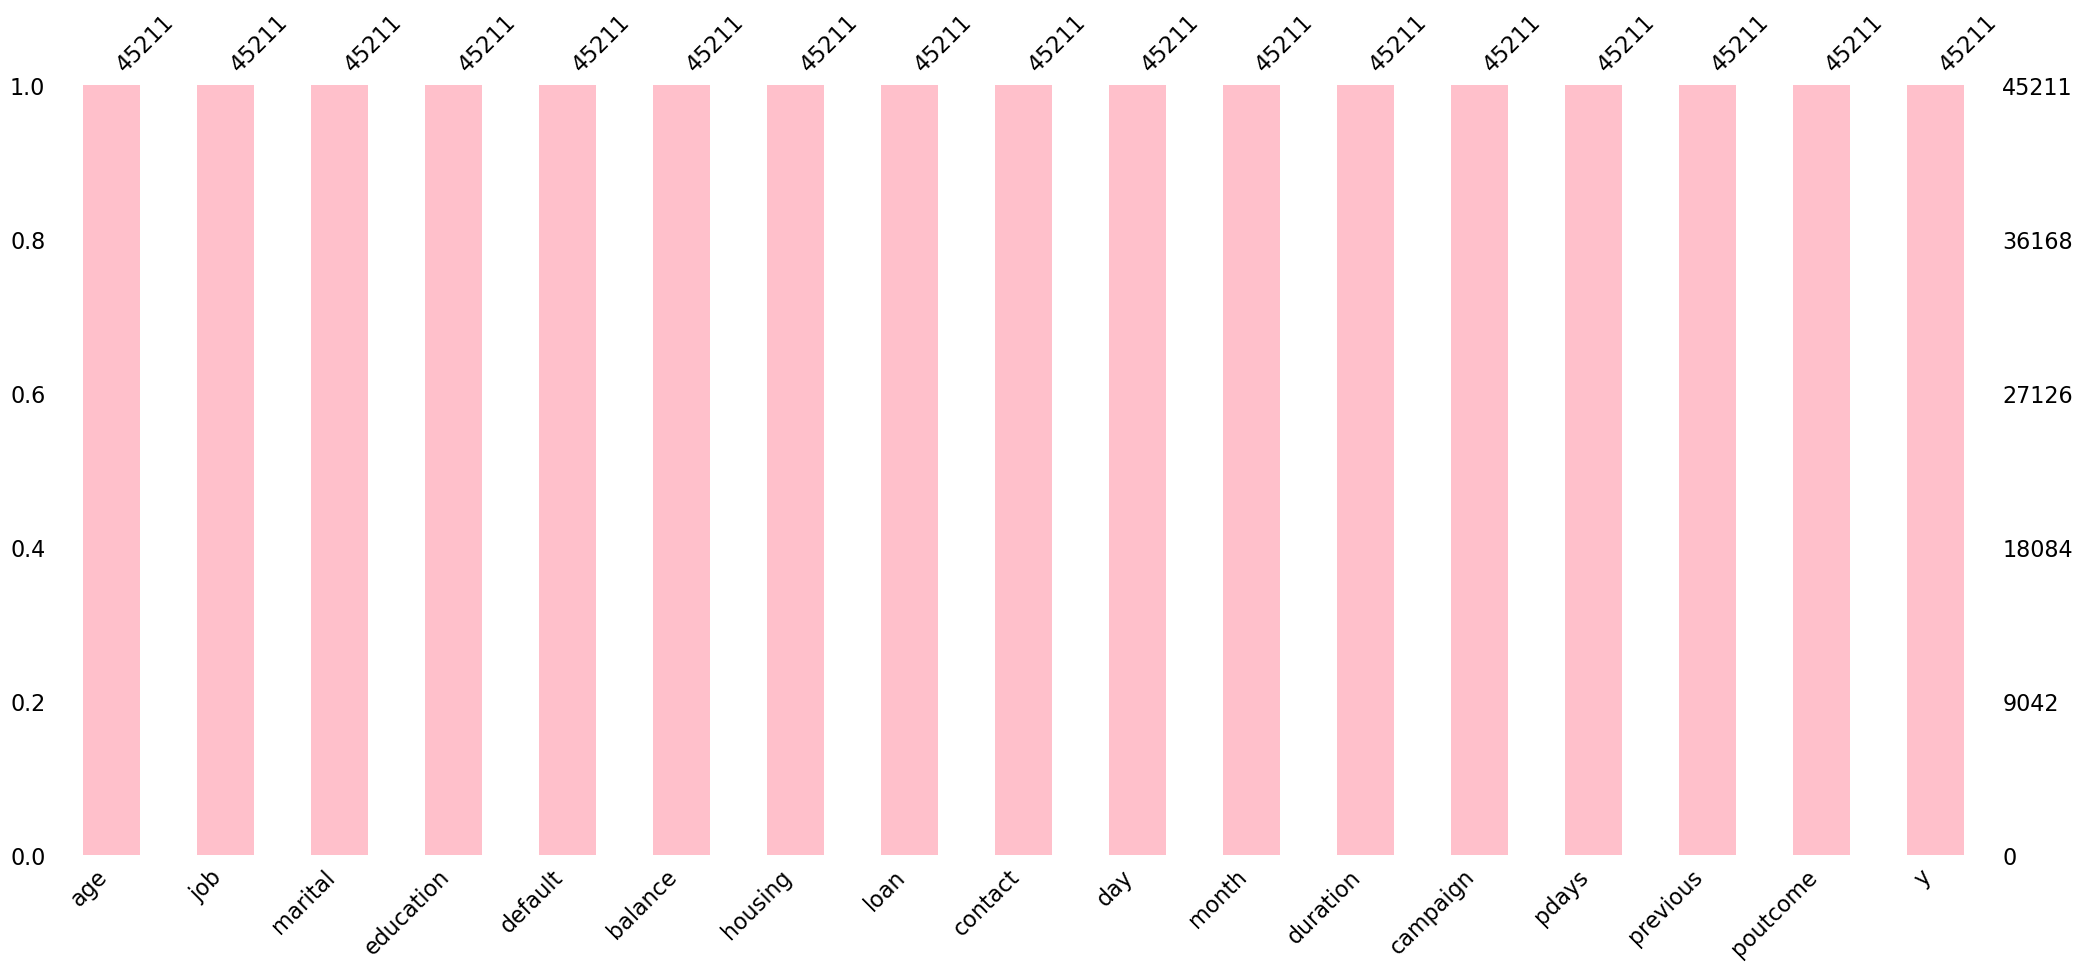

In [18]:
msno.bar(bank_mrkting, color = 'pink')

##### No missing values

# Distribution of Numerical Variables

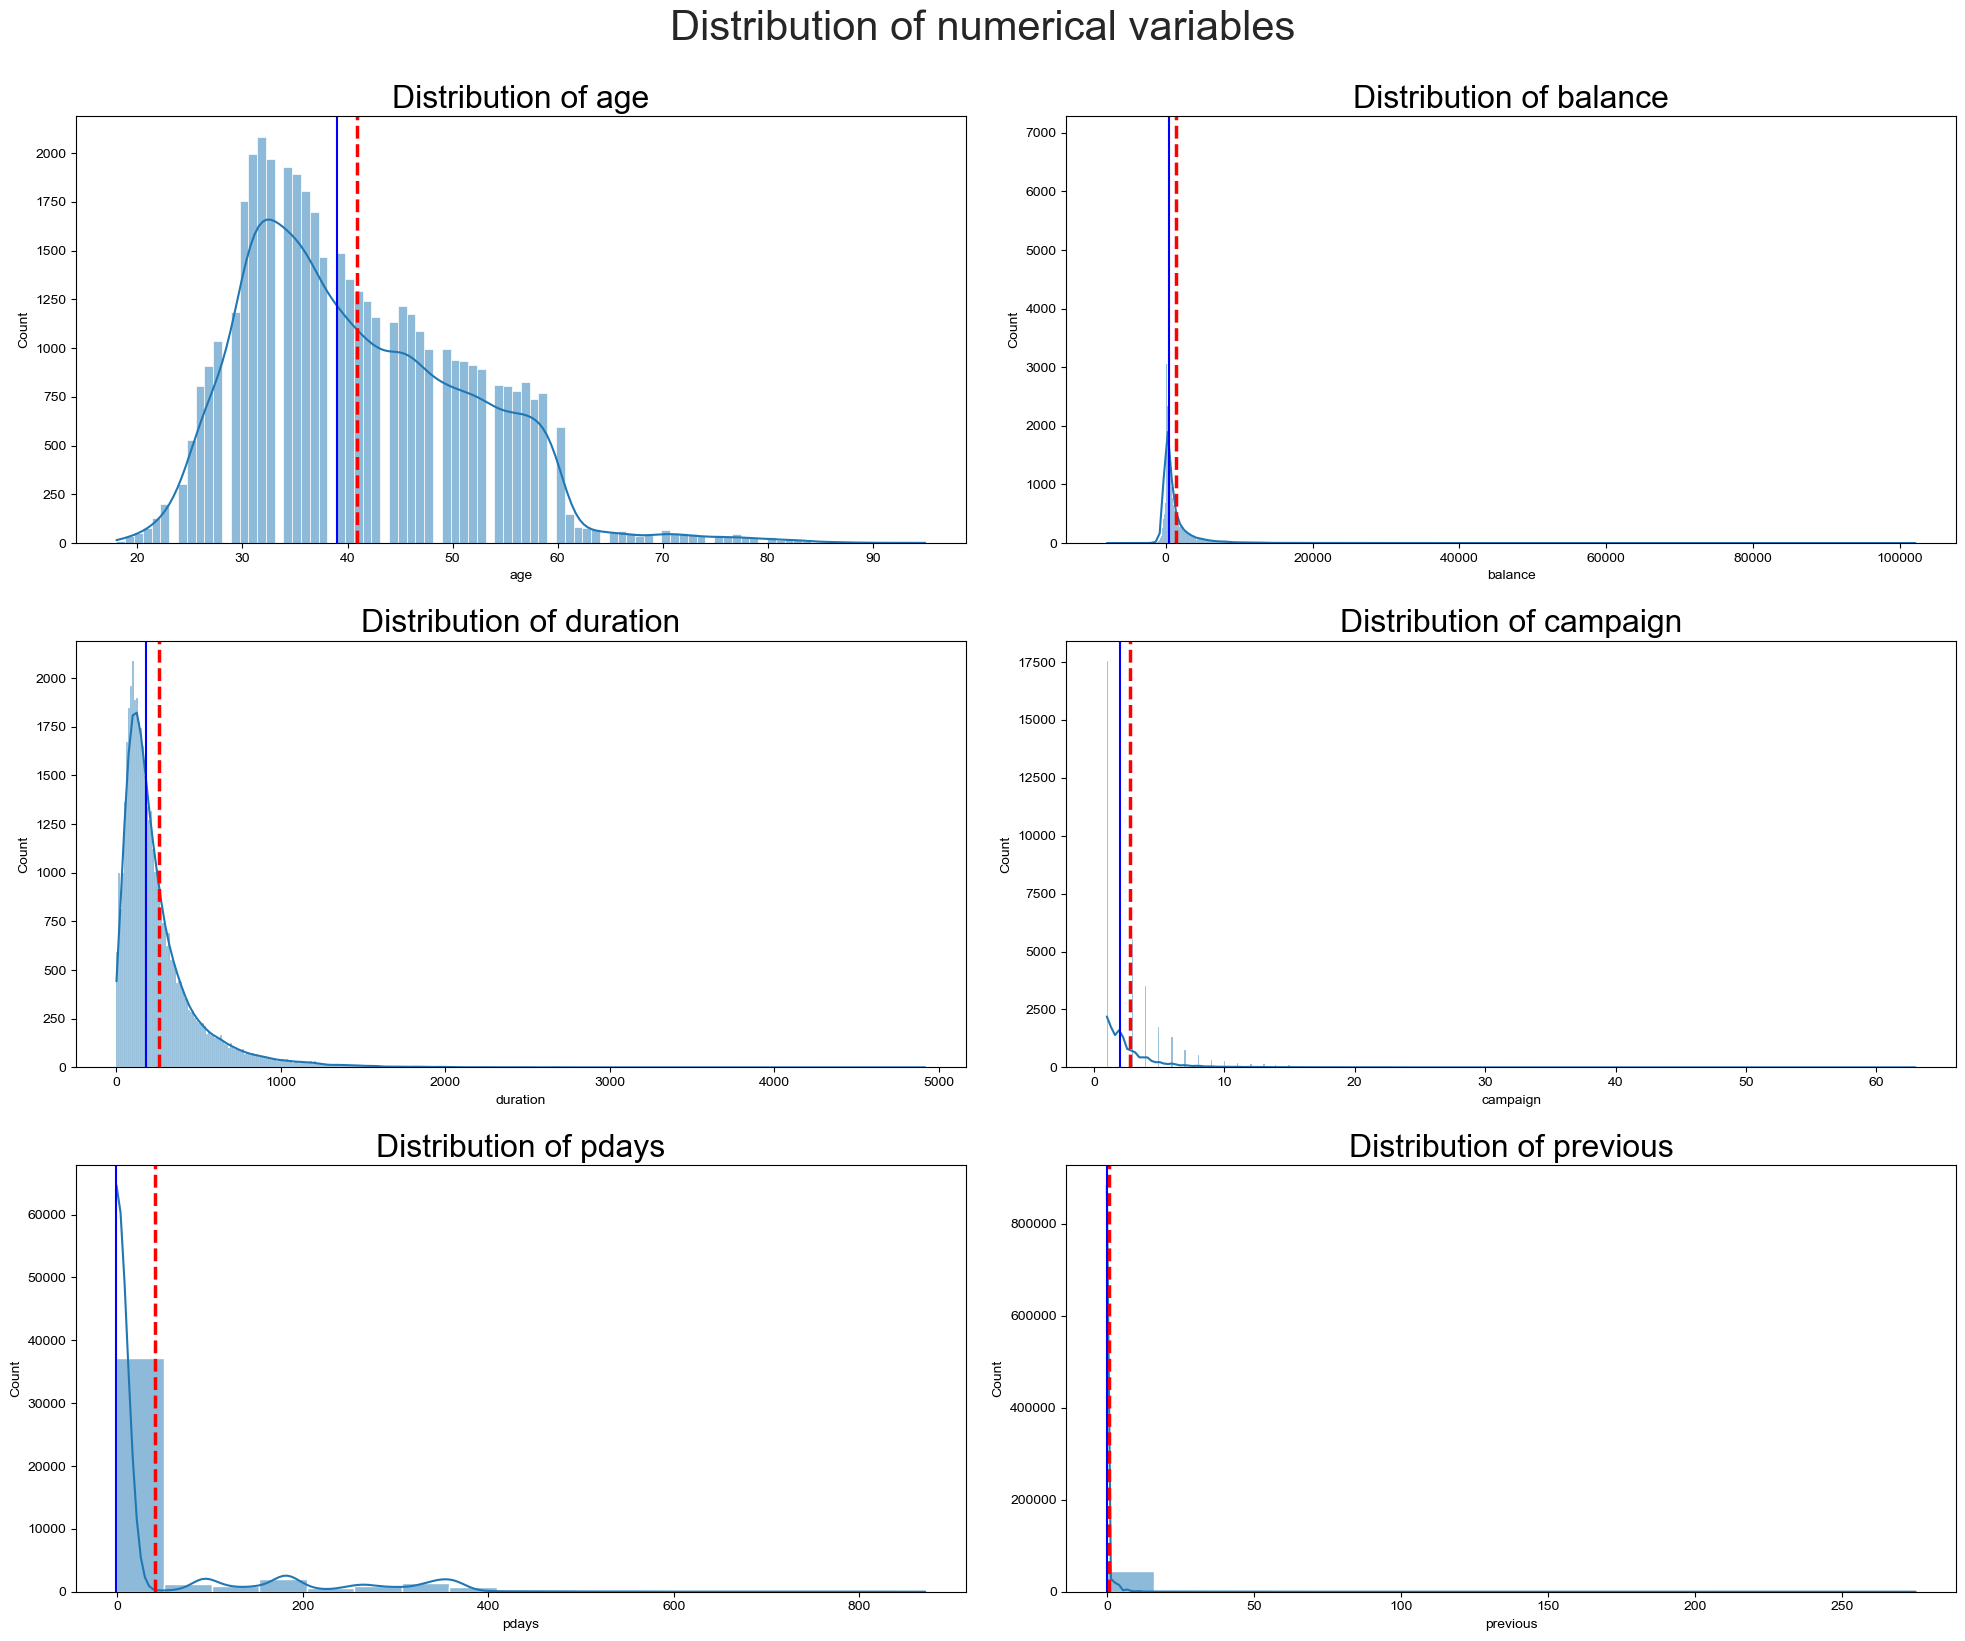

In [19]:
# Initialize a variable n to keep track of subplot numbering.
n = 1
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Define a list of variable names to visualize
nums = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'] 

# Use for loop for getting subplots
for i in nums:
# Plot subplots in rows and columns
    plt.subplot(3,2,n) 
# Get current axes 
    ax = plt.gca()
# Scale font
    sns.set(font_scale = 1.5)
# To plot histograph
    sns.histplot(bank_mrkting[i], kde=True, palette='deep')
# Set Title 
    ax.set_title('Distribution of %s'%(i), fontsize=23)
# Show mean
    plt.axvline(x = bank_mrkting[i].mean(), ls='--', lw=2.5, color='red', label='mean')
# Show median
    plt.axvline(x = bank_mrkting[i].median(), color = 'blue', label = 'median')
    n+=1
# Adjust subplot spacing
    plt.tight_layout()
# Main title
plt.suptitle('Distribution of numerical variables', y = 1.03, fontsize = 30)

# Show plot
plt.show()

#### Observation
* **Age is moderately skewed** <br>
* **All others are highly skewed**

# Checking outliers

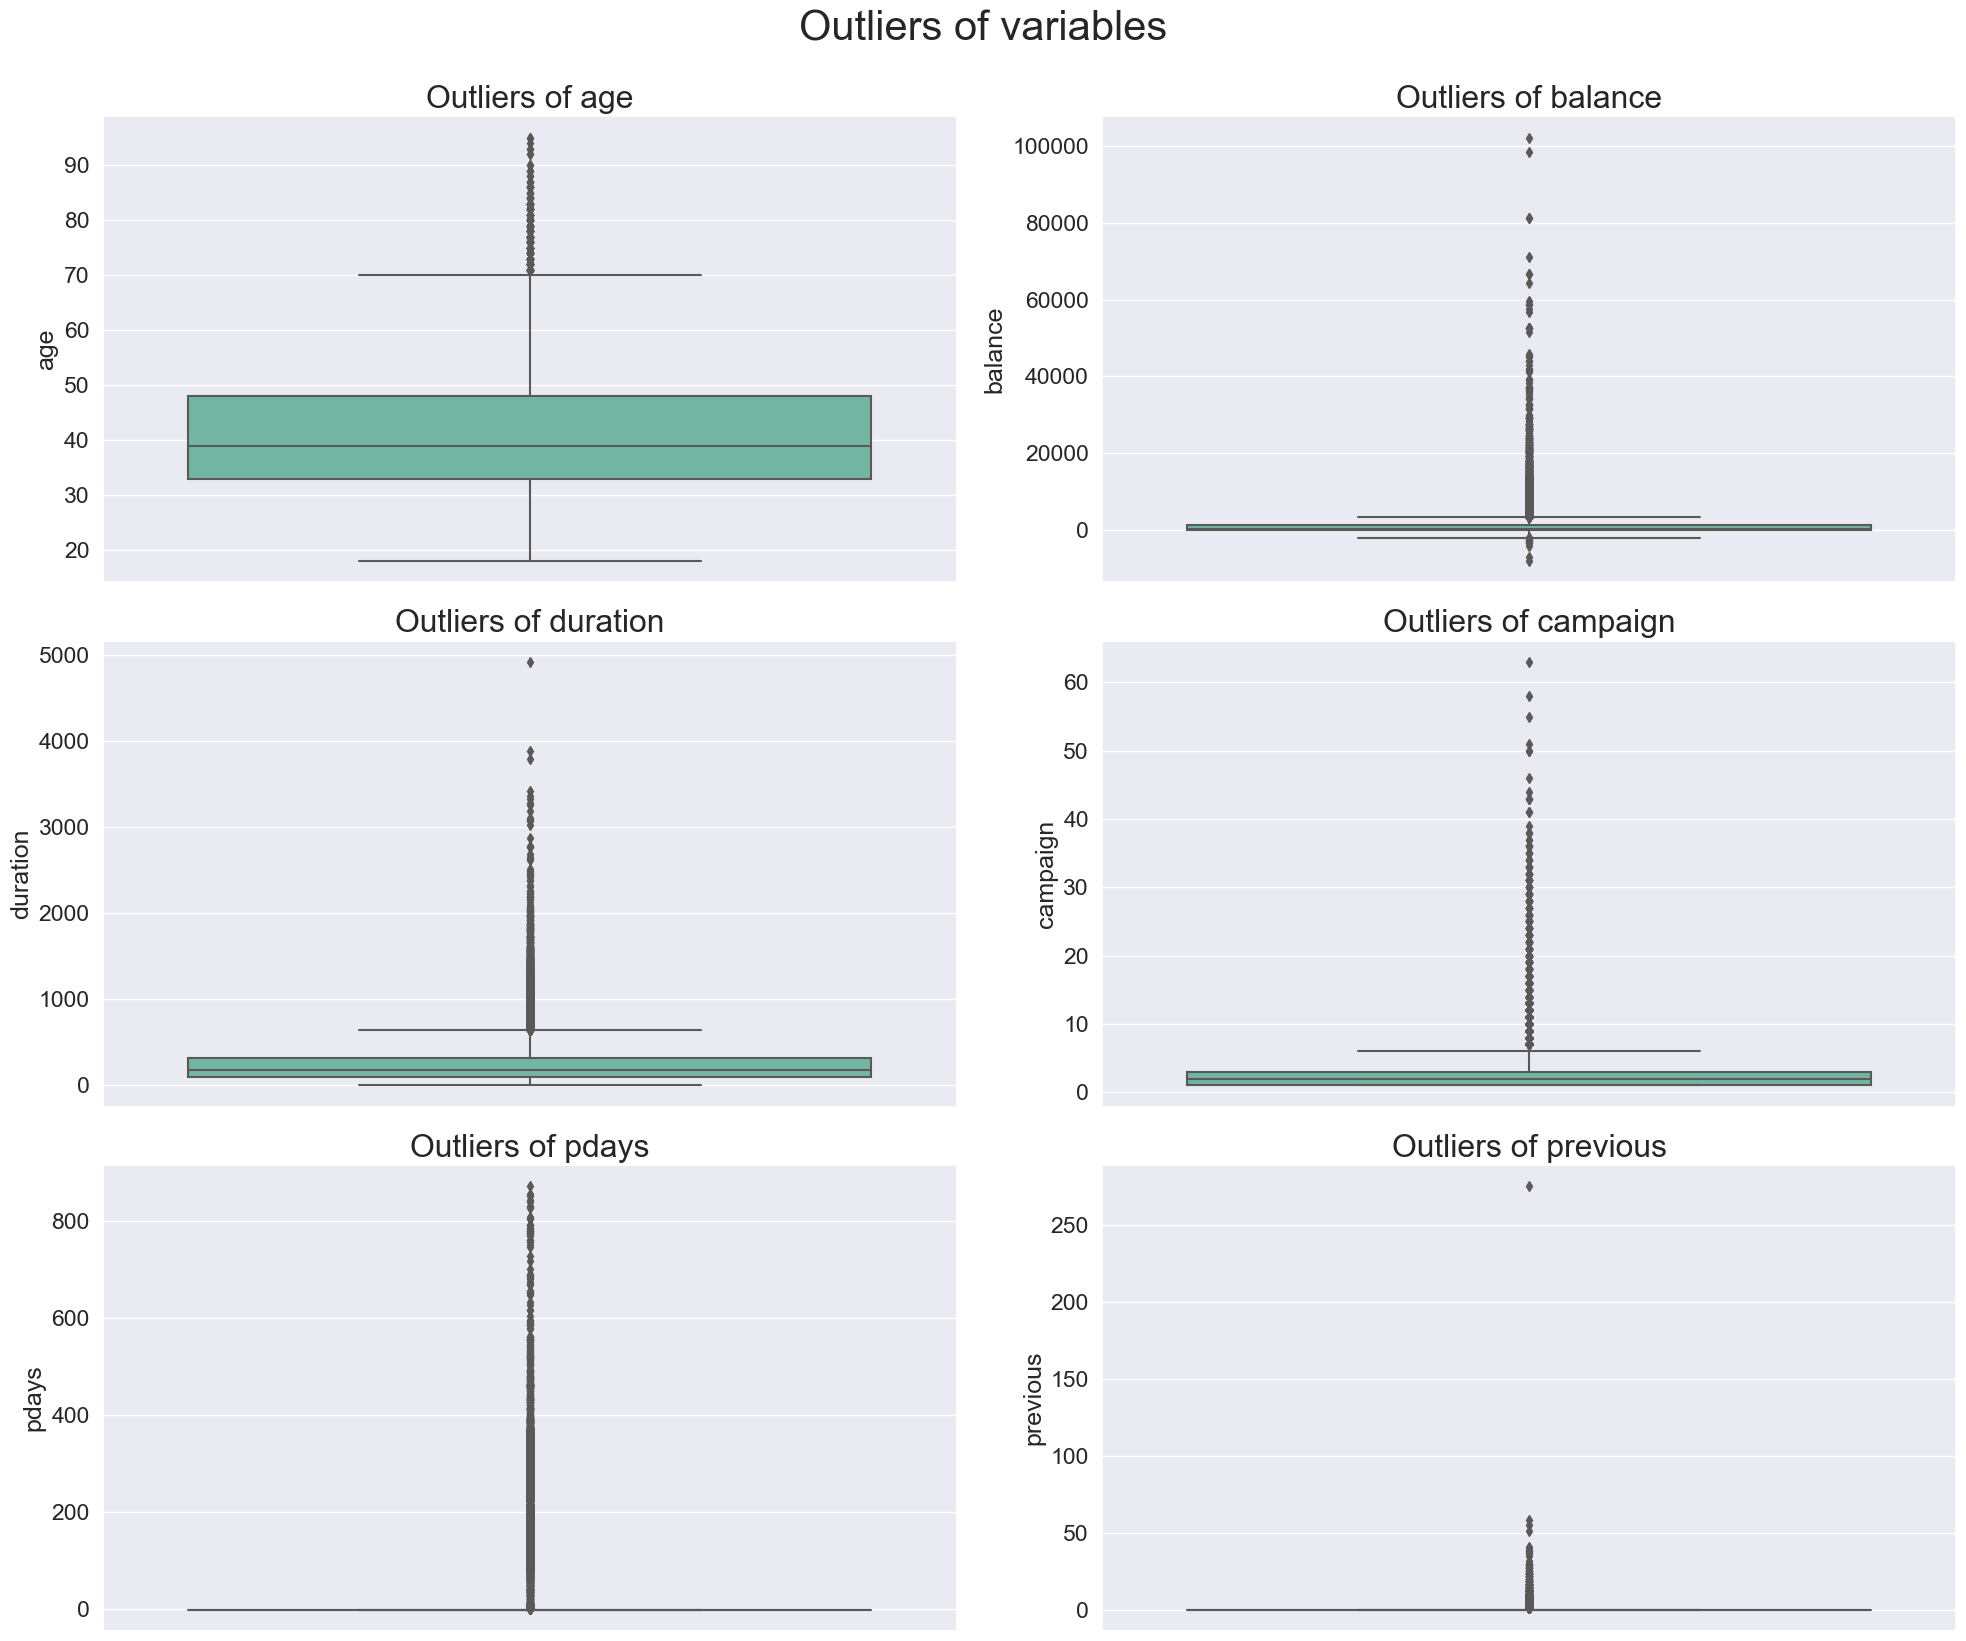

In [20]:
# Initialize a variable n to keep track of subplot numbering.
n = 1
# Plotting subplots
plt.subplots(figsize = (20,16))

# Define a list of variable names to visualize
nums = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for i in nums:
# for loop to getting subplots
    plt.subplot(3,2,n)
# Getting Current axes
    ax = plt.gca()
# Set font scale
    sns.set(font_scale = 1.5)
# Plot boxplot
    sns.boxplot(y = bank_mrkting[i], palette = 'Set2', ax=ax)
# boxplot title
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1
# Adjust subplot spacing
    plt.tight_layout()
# Main Title
plt.suptitle('Outliers of variables', y=1.03, fontsize = 30)
# Show plot
plt.show()

#### Observation
* **Lots of Outliers present in the dataset** <br>
* **All numerical variables are skewed and needed transformation**

# Checking skewness of numerical variables

### See Skewness by plot

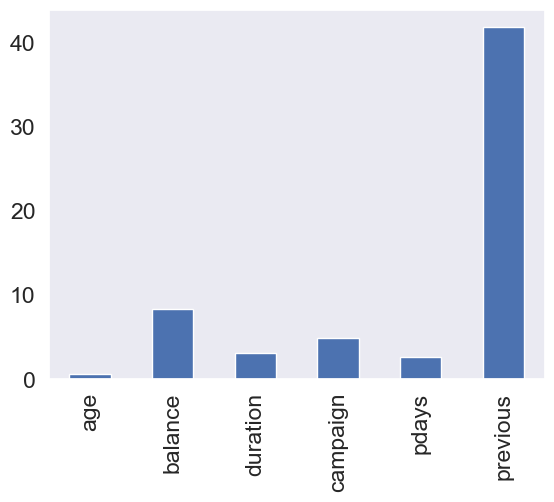

In [21]:
# Barplot given skewness
bank_mrkting.skew(numeric_only = True).plot(kind = 'bar')
plt.grid(False)

#### Observation : 
* **Previous variable have high skewness**

### Finding skewness

In [22]:
# To get skewness
bank_mrkting[nums].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

#### Observation
* **Previous variable has high skewness** <br>

# Feature Engineering

In [23]:
# To copy data
bank_mrkting_n = bank_mrkting.copy(deep = True)

# To replace -1 with nan
bank_mrkting_n['pdays'] = bank_mrkting_n['pdays'].replace(-1, np.nan)

# To replace 0 with nan
bank_mrkting_n['previous'] = bank_mrkting_n['previous'].replace(0, np.nan)

# For reduce skewness, values greater than 500 = 500
bank_mrkting_n.loc[bank_mrkting_n['pdays'] > 500, 'pdays'] = 500

# To reduce skewness, value less than 0 = 2
bank_mrkting_n.loc[bank_mrkting_n['balance'] < 0, 'balance'] = 2

# To reduce skewness, values greater than 20 = 20
bank_mrkting_n.loc[bank_mrkting_n['campaign'] > 20, 'campaign'] = 20

# To reduce skewness, values greater than 9 = 9
bank_mrkting_n.loc[bank_mrkting_n['previous'] > 9, 'previous'] = 9

# Trasformation

 We are having highly skewed data. If there are too much skewness in the data, then many statistical model don't work properly. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model's performance.
 
So, for reducing the skewness __Transformation__ can be done by **Square root(sqrt)** transformation, **Cube root(cbrt)** transformation, **Log** transfomation, **Boxcox** transformation and many others.

## Log Transformation

In [24]:
# To copy data
bank_log = bank_mrkting_n.copy(deep = True)

# Use for loop for log values of all numeric
for i in nums:
    bank_log[i] = np.log(bank_log[i]+1) # log transformation
bank_log[nums].skew() # getting skewness

age         0.112757
balance    -0.793077
duration   -0.454164
campaign    1.228159
pdays      -2.372733
previous    0.639606
dtype: float64

## Square root transformationm

In [25]:
 # To copy data
bank_sqrt = bank_mrkting_n.copy(deep = True)
# Use for loop for sqrt values of all numeric
for i in nums:
    # square root transformation
    bank_sqrt[i] = np.sqrt(bank_sqrt[i])
bank_sqrt[nums].skew() # To get skewness

age         0.382202
balance     1.889859
duration    1.173744
campaign    1.857731
pdays      -0.471006
previous    0.891399
dtype: float64

## Cube root Transformation

In [26]:
# To copy data
bank_cbrt = bank_mrkting_n.copy(deep = True)
#for loop to cube root values of all numeric
for i in nums:
    #Cube root transformation
    bank_cbrt[i] = np.cbrt(bank_cbrt[i])
# Getting skewness
bank_cbrt[nums].skew()

age         0.286500
balance     0.736061
duration    0.640146
campaign    1.456266
pdays      -0.900948
previous    0.713759
dtype: float64

### Observation :
* Here __Cube root(cbrt) transformation__ is overall performing better compare to other transformation methods.

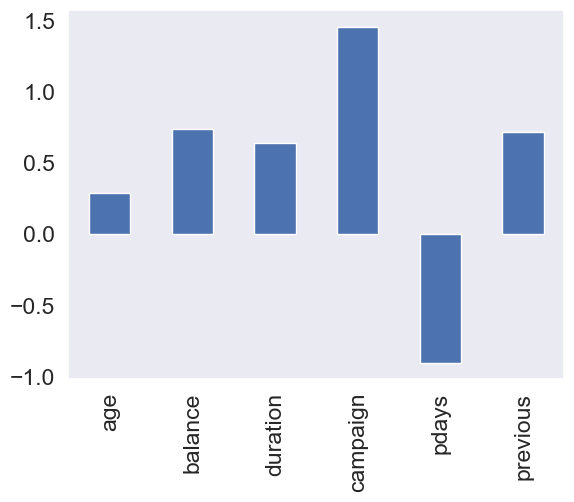

In [27]:
# To get bar plot showing skewness
bank_cbrt.skew(numeric_only = True).plot(kind = 'bar');
plt.grid(False)

### Observation:
* Here __Cube root(cbrt) transformation__ reduce skewness of variables as compare to earlier

### Distribution of Variables after Transformation

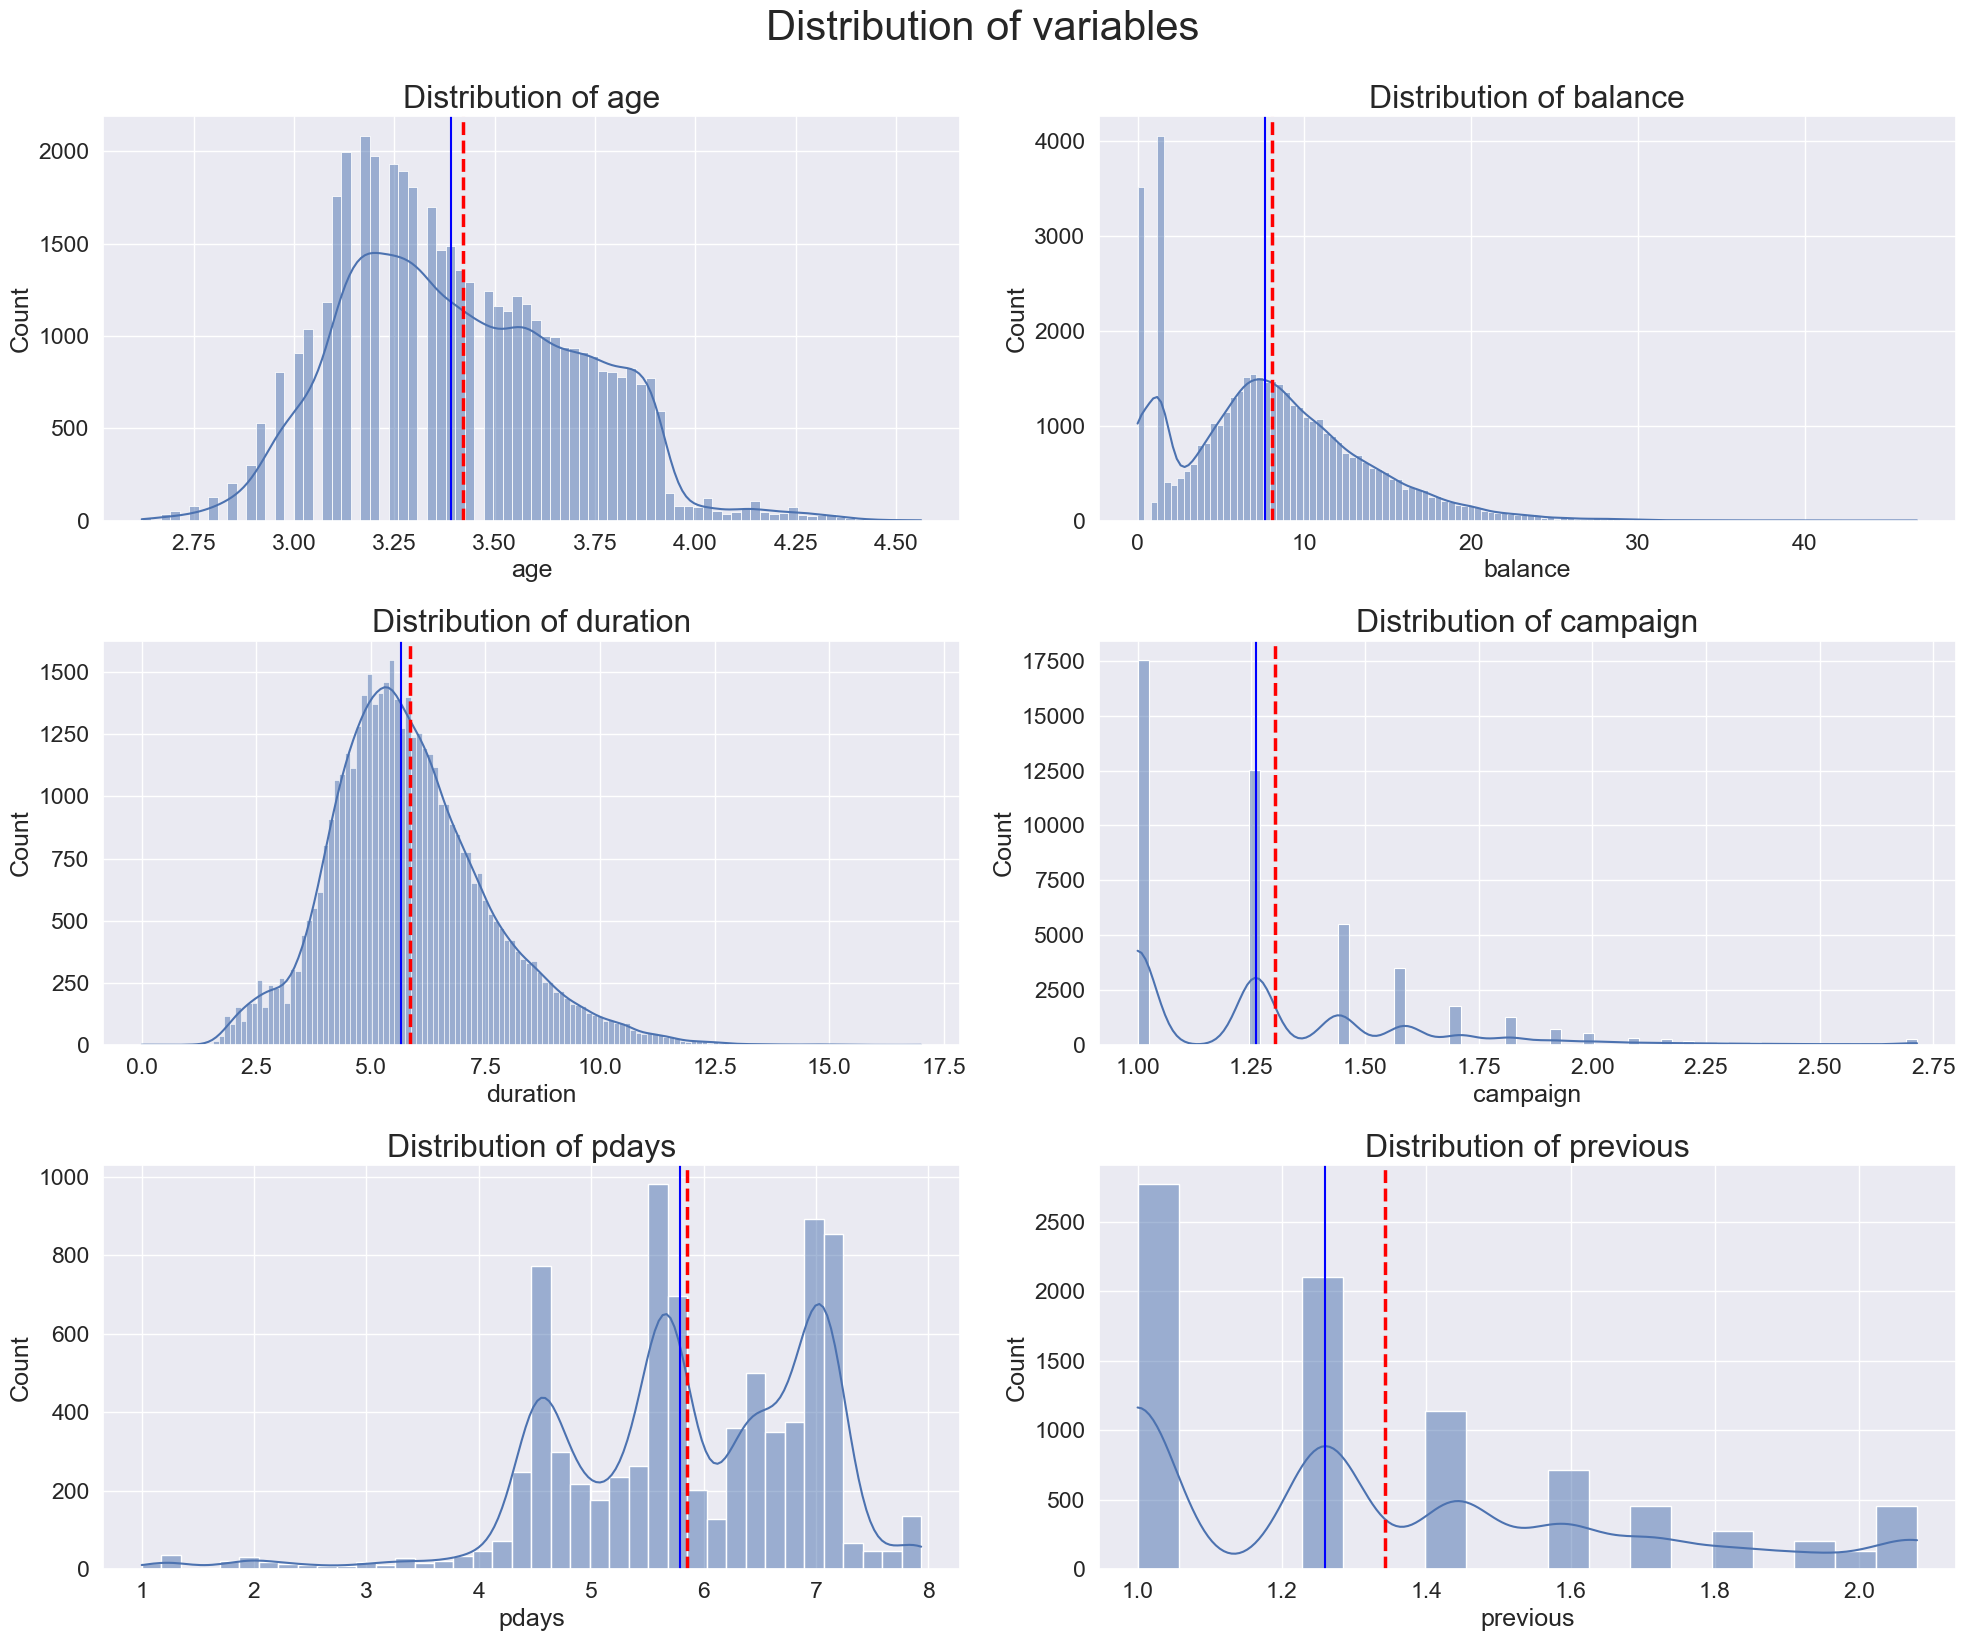

In [28]:
# Initializes a variable n with a value of 1.
n = 1
# subplots figsize
plt.subplots (figsize = (20,16))

# Define nums
nums =('age','balance','duration','campaign','pdays','previous')
# Use for loop for getting subplots
for i in nums:
# specifies the current subplot location in a 3x2 grid of subplots.
    plt.subplot(3,2,n)
# Getting current axes
    ax = plt.gca()
# Scale font
    sns.set(font_scale = 1.5)
# To plot histogram
    sns.histplot(bank_cbrt[i], kde = True, palette = 'Set3')
# Title of histoplot
    ax.set_title('Distribution of %s'%(i), fontsize=23)
# Show mean in plot
    plt.axvline(x=bank_cbrt[i].mean(),ls='--', lw=2.5, color='red', label='mean')
# Show median in plot
    plt.axvline(x=bank_cbrt[i].median(), color='blue', label='median')
#  Increments the n variable to move to the next subplot.
    n+=1
# adjusts the spacing between subplots for a better layout.
    plt.tight_layout()
# To give Main Title
plt.suptitle('Distribution of variables', y=1.03, fontsize = 30)
# Show Plot
plt.show()

#### Observations:
* Here after __Cube root(cbrt)transformation__.
* __Age__ variable become statistically symmetrical.
* __Balance__,__Duration__,__Pdays__,__Previous__ variables become moderately statistically symmetrical.

## Outliers after Transformation

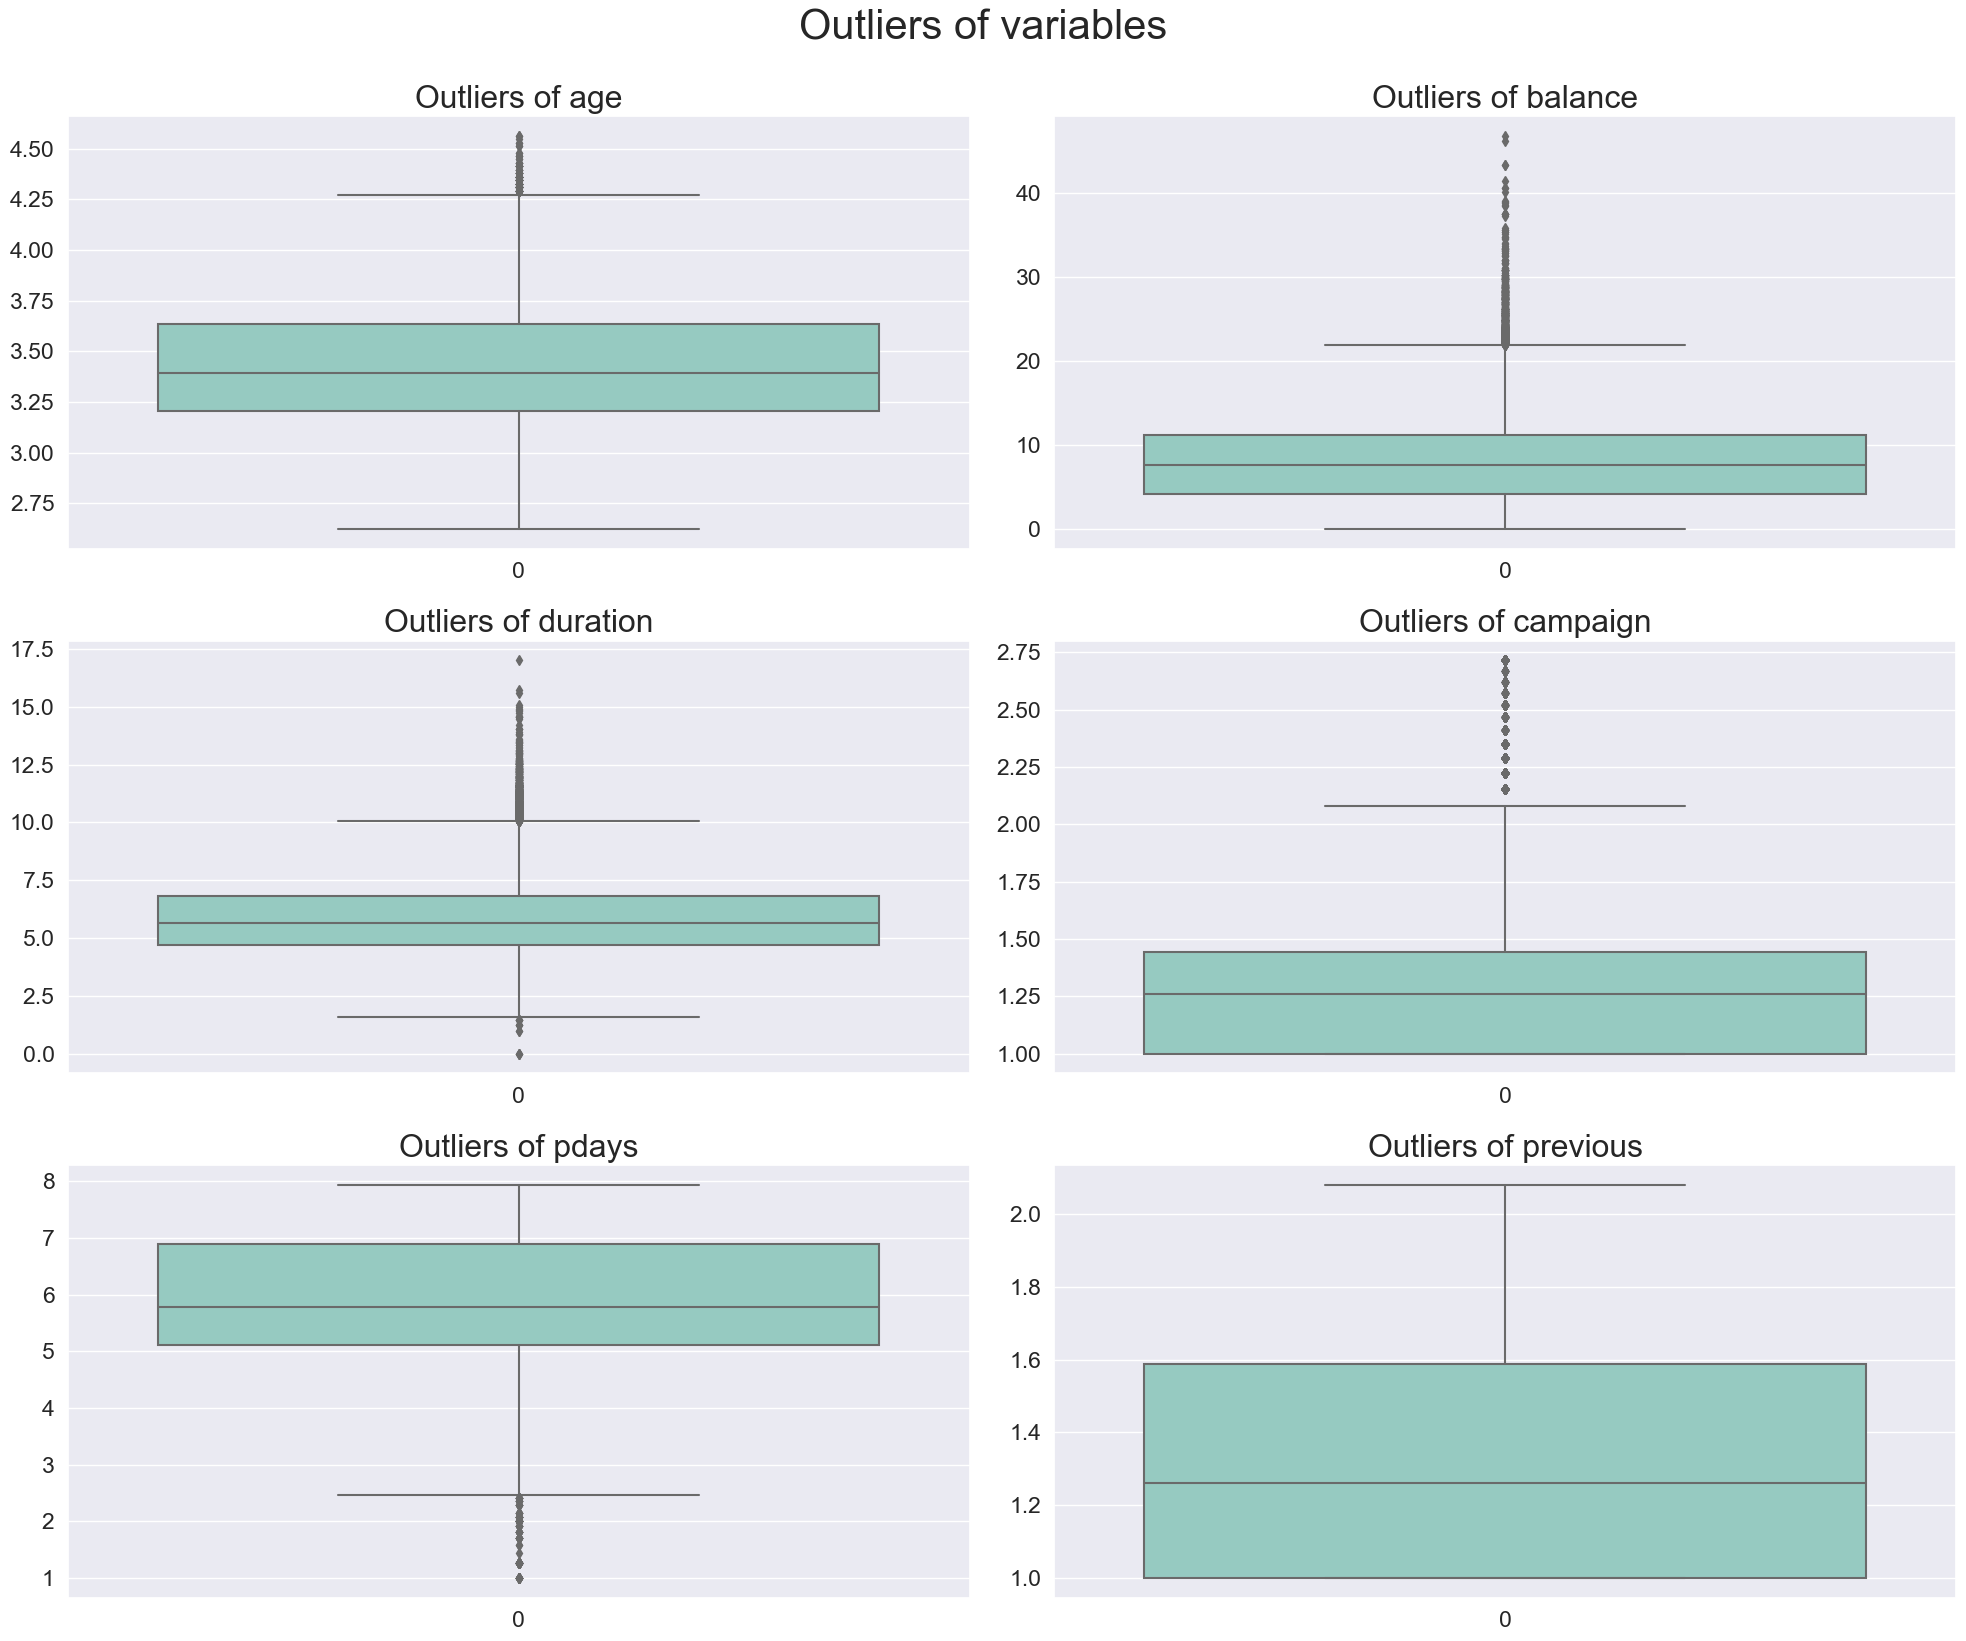

In [29]:
# Initializes a variable n with a value of 1.
n = 1
# subplots figsize
plt.subplots (figsize = (20,16))

# Use for loop for getting subplots
for i in nums:
# specifies the current subplot location in a 3x2 grid of subplots.
    plt.subplot(3,2,n)
# Getting current axes
    ax = plt.gca()
# Scale font
    sns.set(font_scale = 1.5)
# To plot Boxplot
    sns.boxplot(bank_cbrt[i], palette = 'Set3')
# Title of Boxplot
    ax.set_title('Outliers of %s'%(i), fontsize=23)

#  Increments the n variable to move to the next subplot.
    n+=1
# adjusts the spacing between subplots for a better layout.
    plt.tight_layout()
# To give Main Title
plt.suptitle('Outliers of variables', y=1.03, fontsize = 30)
# Show Plot
plt.show()

#### Observation:
* As we can see here, skewness and the outliers are decreased after applying Cuberoot transformation.

# Distribution of categorical variables

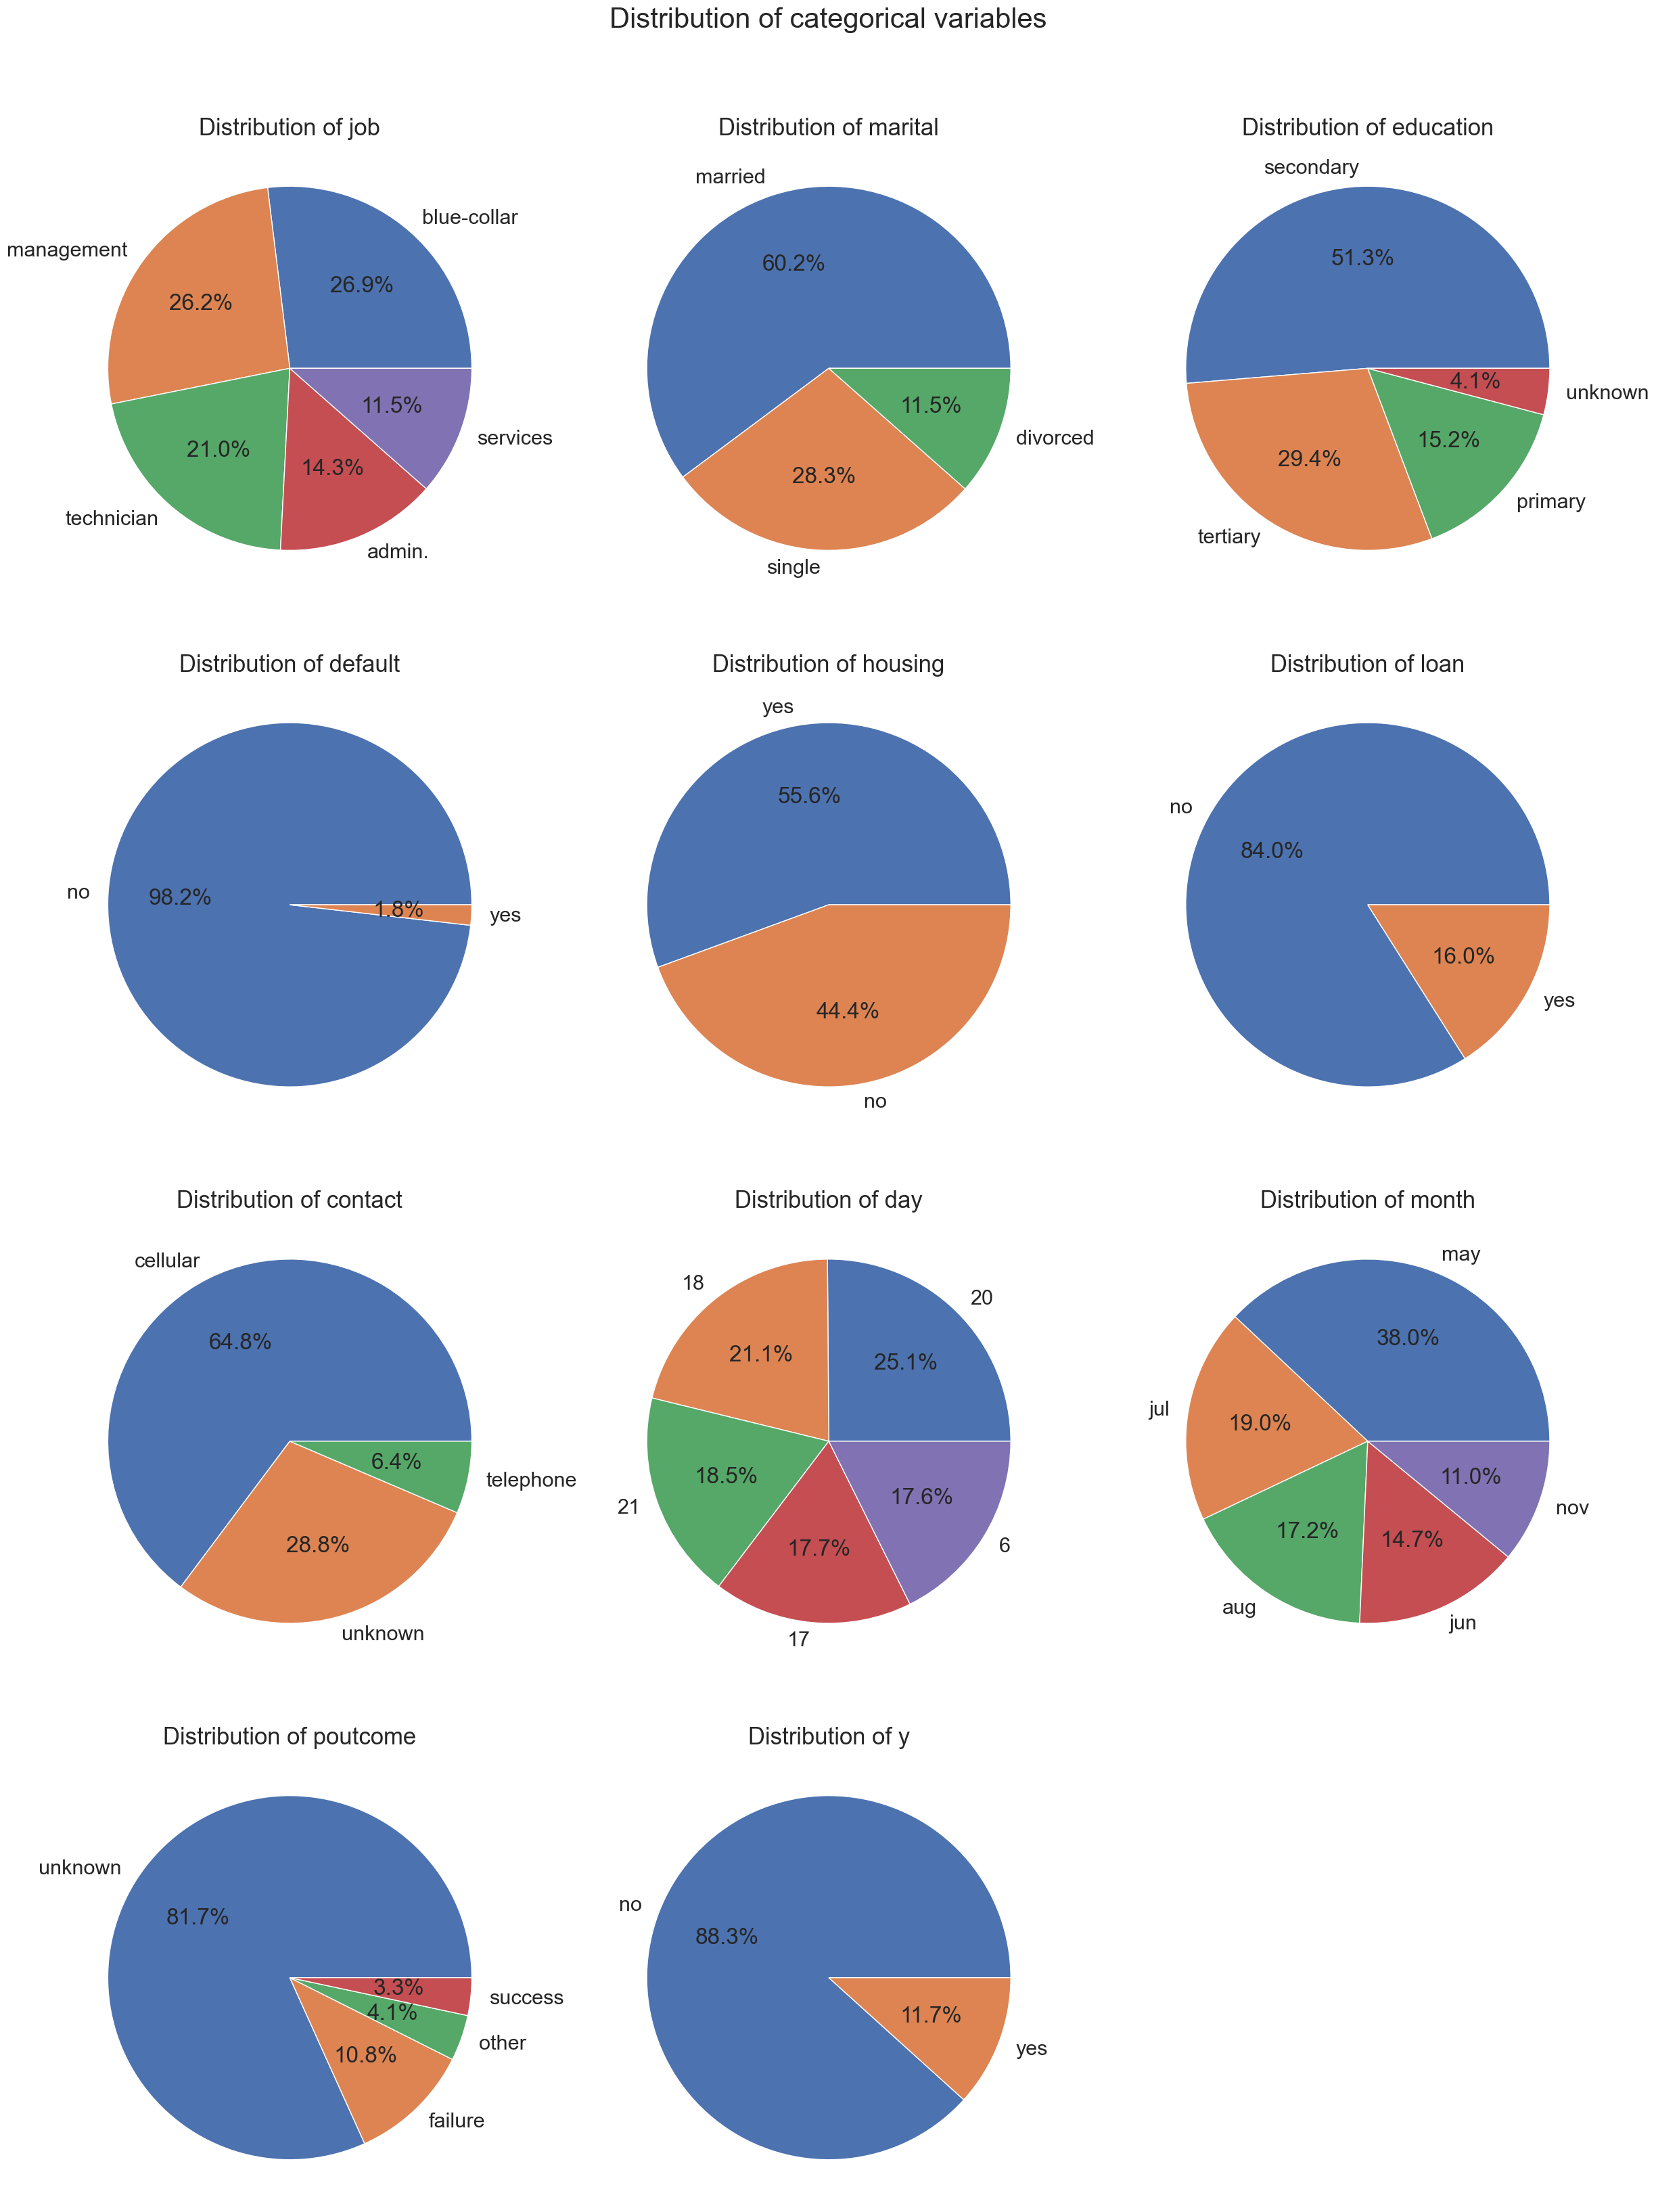

In [30]:
# Initializes a variable count with a value of 1.
count = 1
# Figure size of subplot
plt.subplots(figsize=(25,40))

# Define Cats
cats = ('job','marital','education','default','housing','loan','contact','day','month','poutcome','y')
# For loop getting subplots
for i in cats:
# specifies the current subplot location in a 5x3 grid of subplots.
    plt.subplot(5,3,count)
# Get current axes
    ax = plt.gca()
# Scale font
    sns.set(font_scale = 2)
# To plot Pie
    plt.pie(bank_mrkting[i].value_counts().values[:5], labels = bank_mrkting[i].value_counts().index[:5], autopct='%1.1f%%')
# Title each plot
    ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increments the n variable to move to the next subplot.
    count += 1
# adjusts the spacing between subplots for a better layout.
    plt.tight_layout()
# Set title entire plot
plt.suptitle('Distribution of categorical variables', y = 1.03, fontsize = 30)
# Show plot
plt.show()

**Observations :**<br>
* Job : Blue Collar, Management, Technician jobs are in higher percent.
* Marital : Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal  loan
* Poutcome : did not participate in previous campaigns are high.
* Contact : Clients mostly have cellular contact.
* Day : Most of the days are 20, 18, 21
* Month : Most of the months are May, July, August.
* Poutcome : did not participate in previous campaigns are high.
* y : Most of clients not subscribed to term deposit.

# Categorical Variables Vs Numerical Variables

### Categorical variables Vs Ages

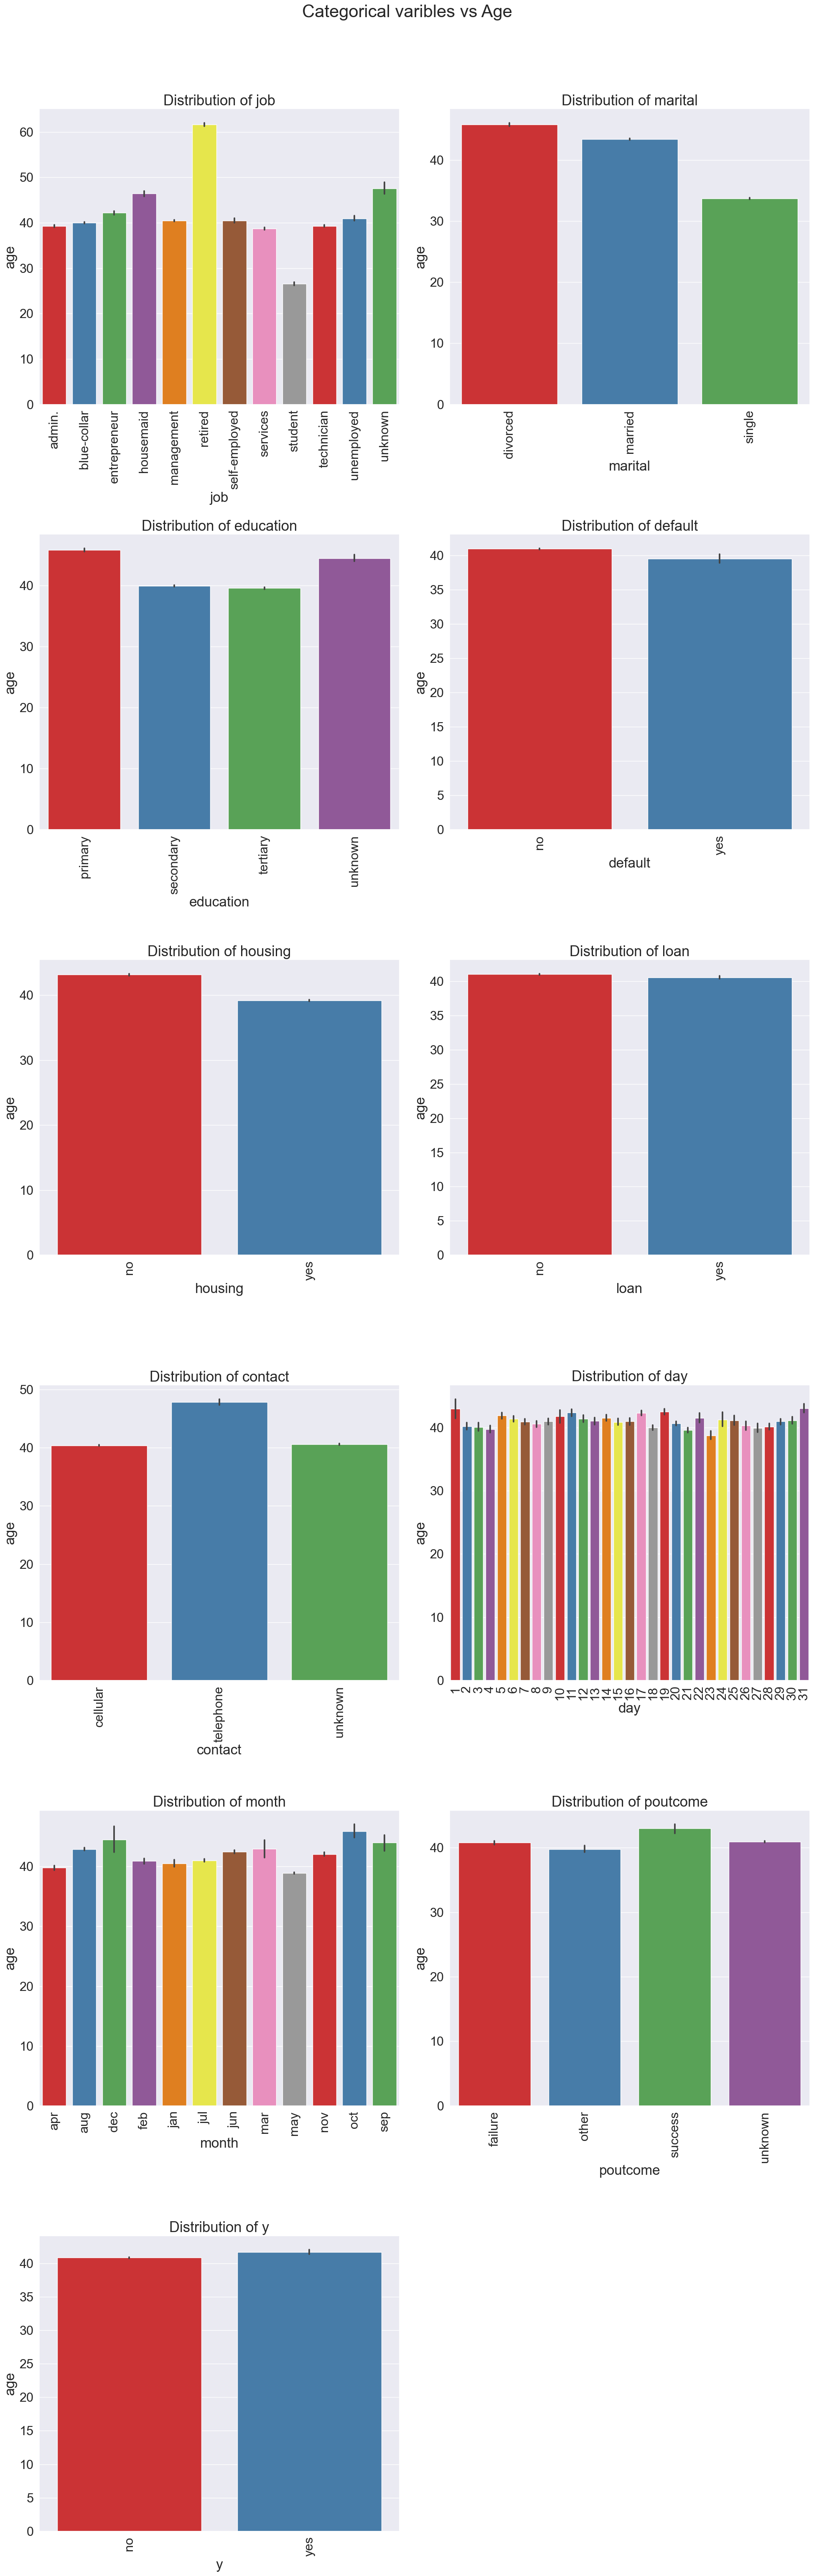

In [31]:
# Initializes a variable count with a value of 1.
count = 1
# Figure size of subplots
plt.subplots(figsize=(20,60))
# for loop to get subplot
for i in cats:
# specifies the current subplot location in a 6x2 grid of subplots.
    plt.subplot(6,2,count)
# Get current axes
    ax = plt.gca()
# Set scale font
    sns.set(font_scale = 2)
# Bar Plot
    sns.barplot(x=bank_mrkting[i], y=bank_mrkting['age'], palette ='Set1')
# Rotate of x axis names to 90 degrees 
    plt.xticks(rotation = 90)
# Title to each plot
    ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increments the count variable to move to the next subplot.
    count += 1
# adjusts the spacing between subplots for a better layout.
    plt.tight_layout()
# To set main title
plt.suptitle('Categorical varibles vs Age', y = 1.03, fontsize = 30)

# Show plot
plt.show()

**Observations :**<br>
**Categorical Vs Age :**<br>
* Job : clients which are retired, unknown and housemaid are in high age.
* Marital : Divorced clients are in high age.
* Education : Primary educated clients have high age.
* Default : By default who doesn't have loan are high age.
* Housing : Most no of clients having no house loan have high age.
* Loan : Most no of clients doesn't have personal  loan and those have loan have same age.
* Contact : Most no of clients having telephone contact have high age.
* Day : No of clients come on 1 and 31 day have high age.
* Month : No of clients come on December and October month have high age.
* Poutcome : Clients Success in previous campaigns have high age.
* y : Clients subscribed to term deposit have high age.

### Categorical variables Vs Balance

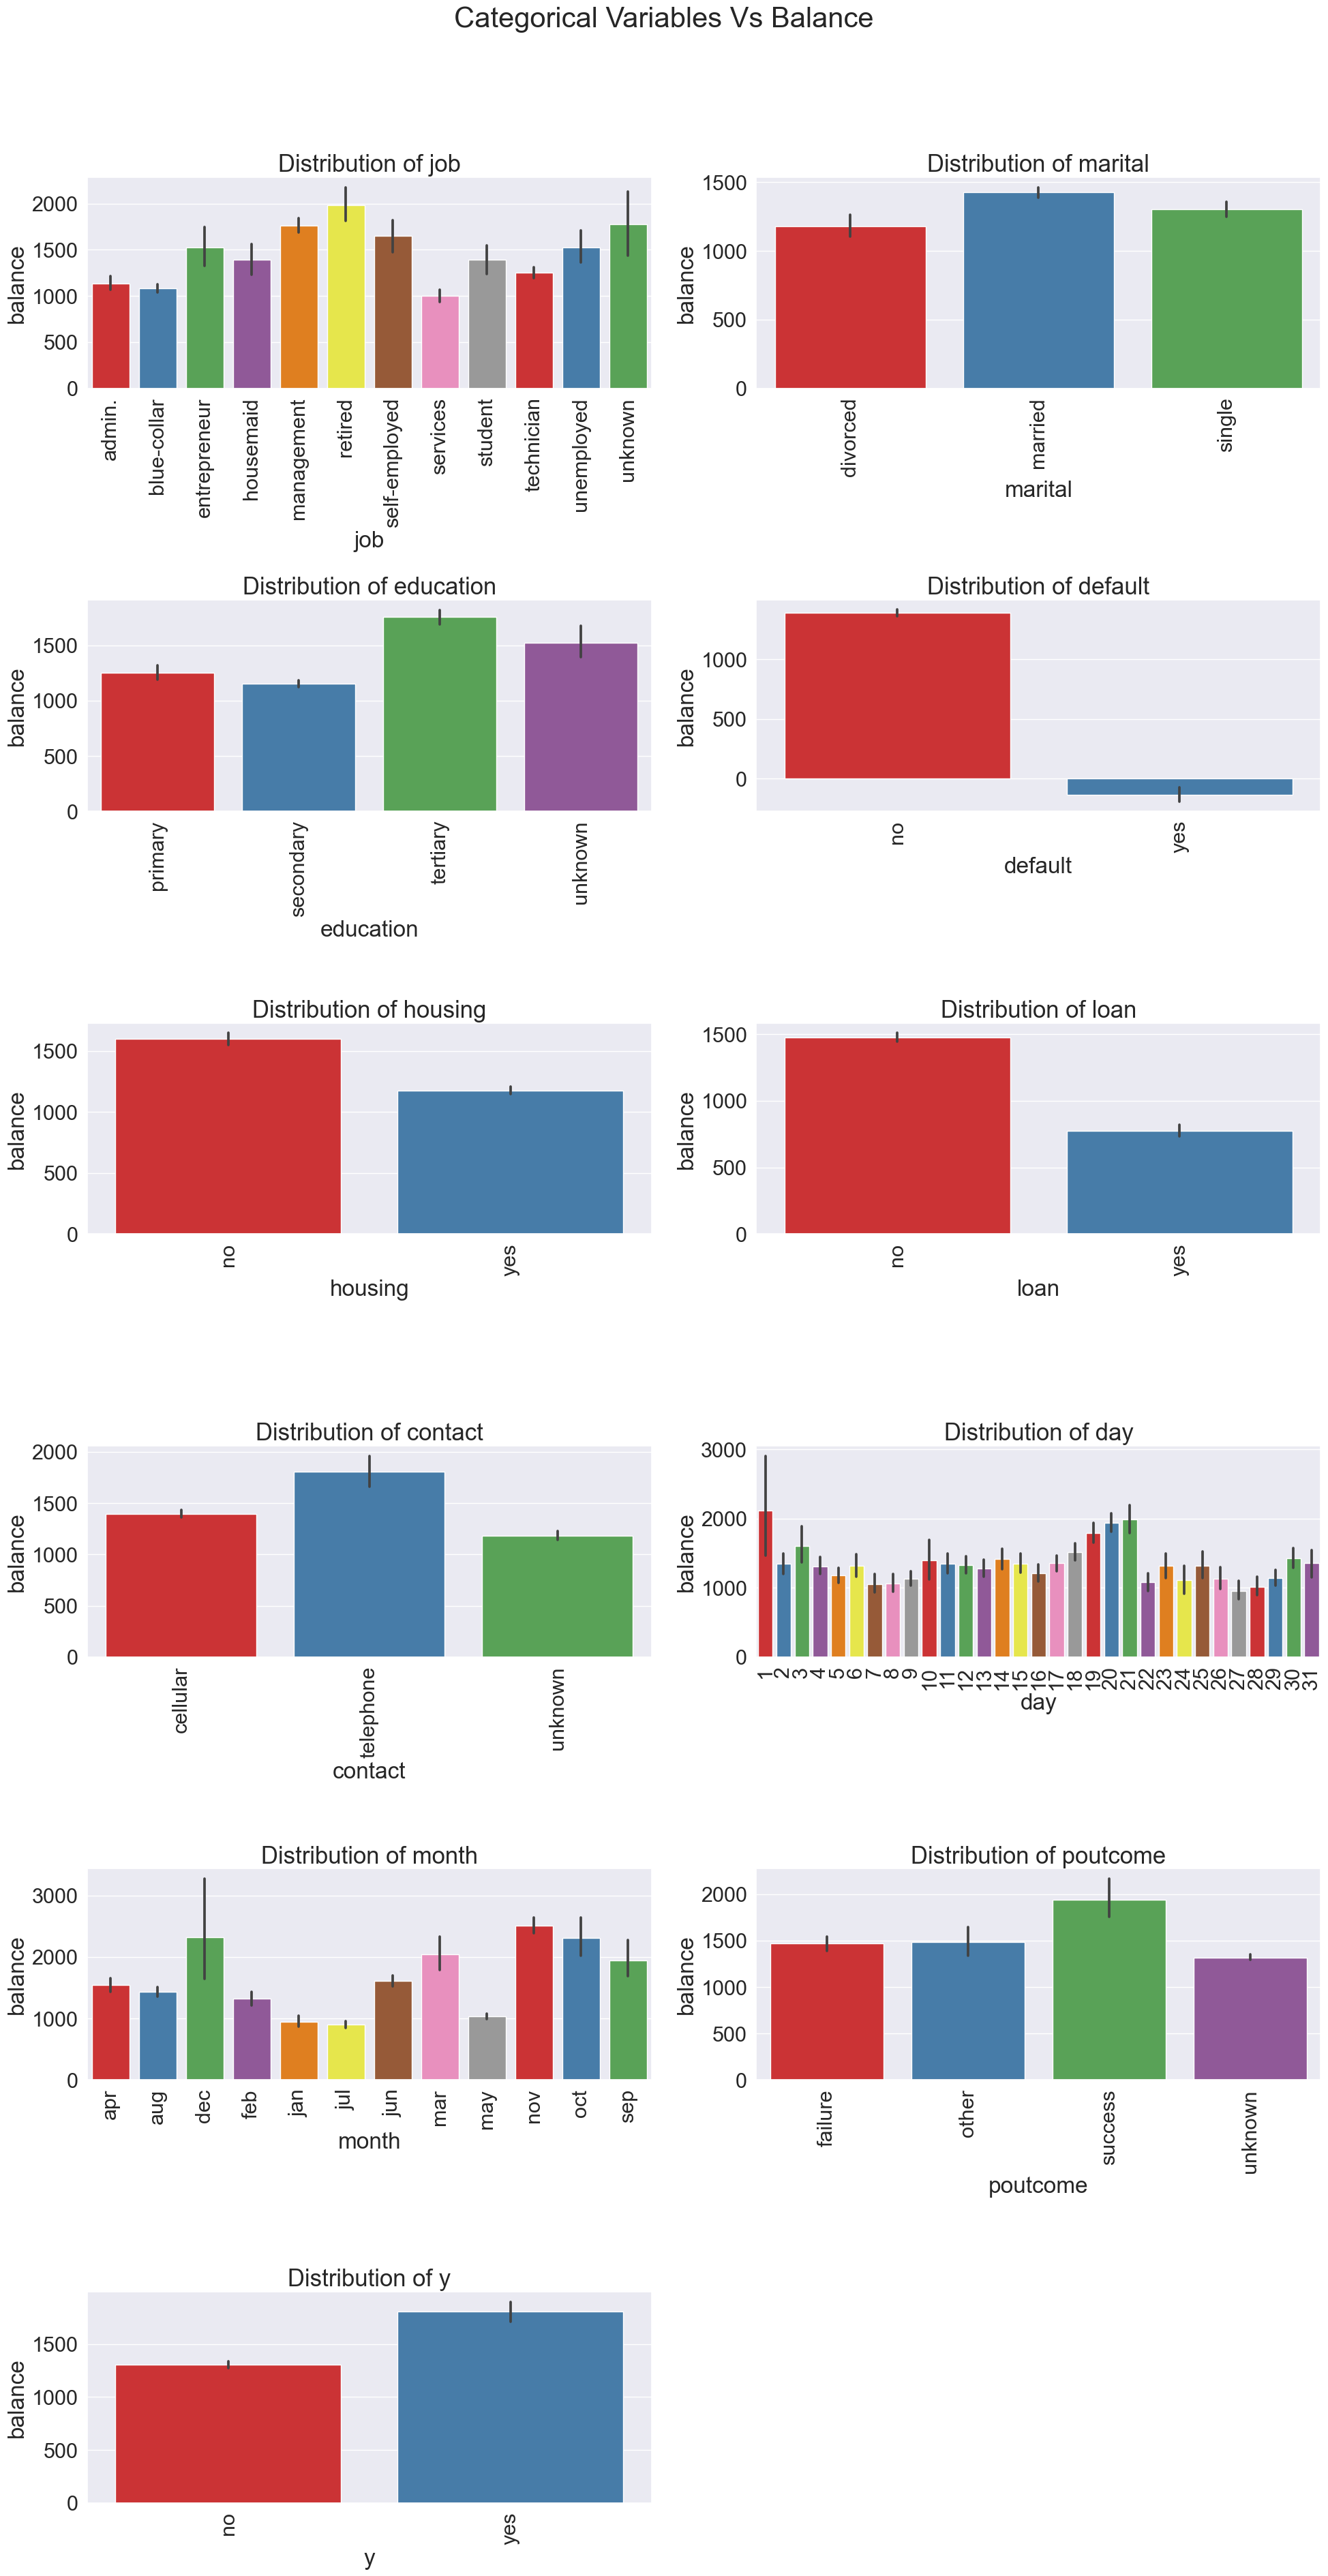

In [32]:
# Initializes a variable count with a value of 1.
count = 1
# Set figsize of subplots
plt.subplots(figsize = (20,60))
# For loop to get subplots
for i in cats:
# specifies the current subplot location in a 10x2 grid of subplots.
    plt.subplot(10,2,count)
# Get current axes
    ax = plt.gca()
# Set scale font
    sns.set(font_scale = 2)
# To get bar plot
    sns.barplot(x=bank_mrkting[i], y=bank_mrkting['balance'], palette='Set1')
# Rotate x axis ticks
    plt.xticks(rotation = 90)
# Set title to each plot
    ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increments the count variable to move to the next subplot.
    count += 1
# adjusts the spacing between subplots for a better layout.
    plt.tight_layout()
# Set Main Title
plt.suptitle('Categorical Variables Vs Balance', y =1.03, fontsize = 30)
# Show Plot
plt.show()

**Observations :**<br>
**Categorical Vs Balance :**<br>
* Job : clients which are retired, unknown and management have high balance.
* Marital : Married clients have high balance.
* Education : Tertiary educated clients have high balance.
* Default : By default who doesn't have loan have high balance.
* Housing : Most no of clients having no house loan have high balance.
* Loan : Most no of clients doesn't have personal  loan having high balance.
* Contact : Most no of clients having telephone contact have high balance.
* Day : No of clients come on 1, 20,21 day have high balance.
* Month : No of clients come on November and October month have high balance.
* Poutcome : Clients Success in previous campaigns have high balance.
* y : Clients subscribed to term deposit have high balance.

# Categorical Variable Vs Dependent (y) Variable (Categorical)

In [33]:
# List of  categorical variables
cat1 = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']

# Independent Variable
cat2 = ['y']

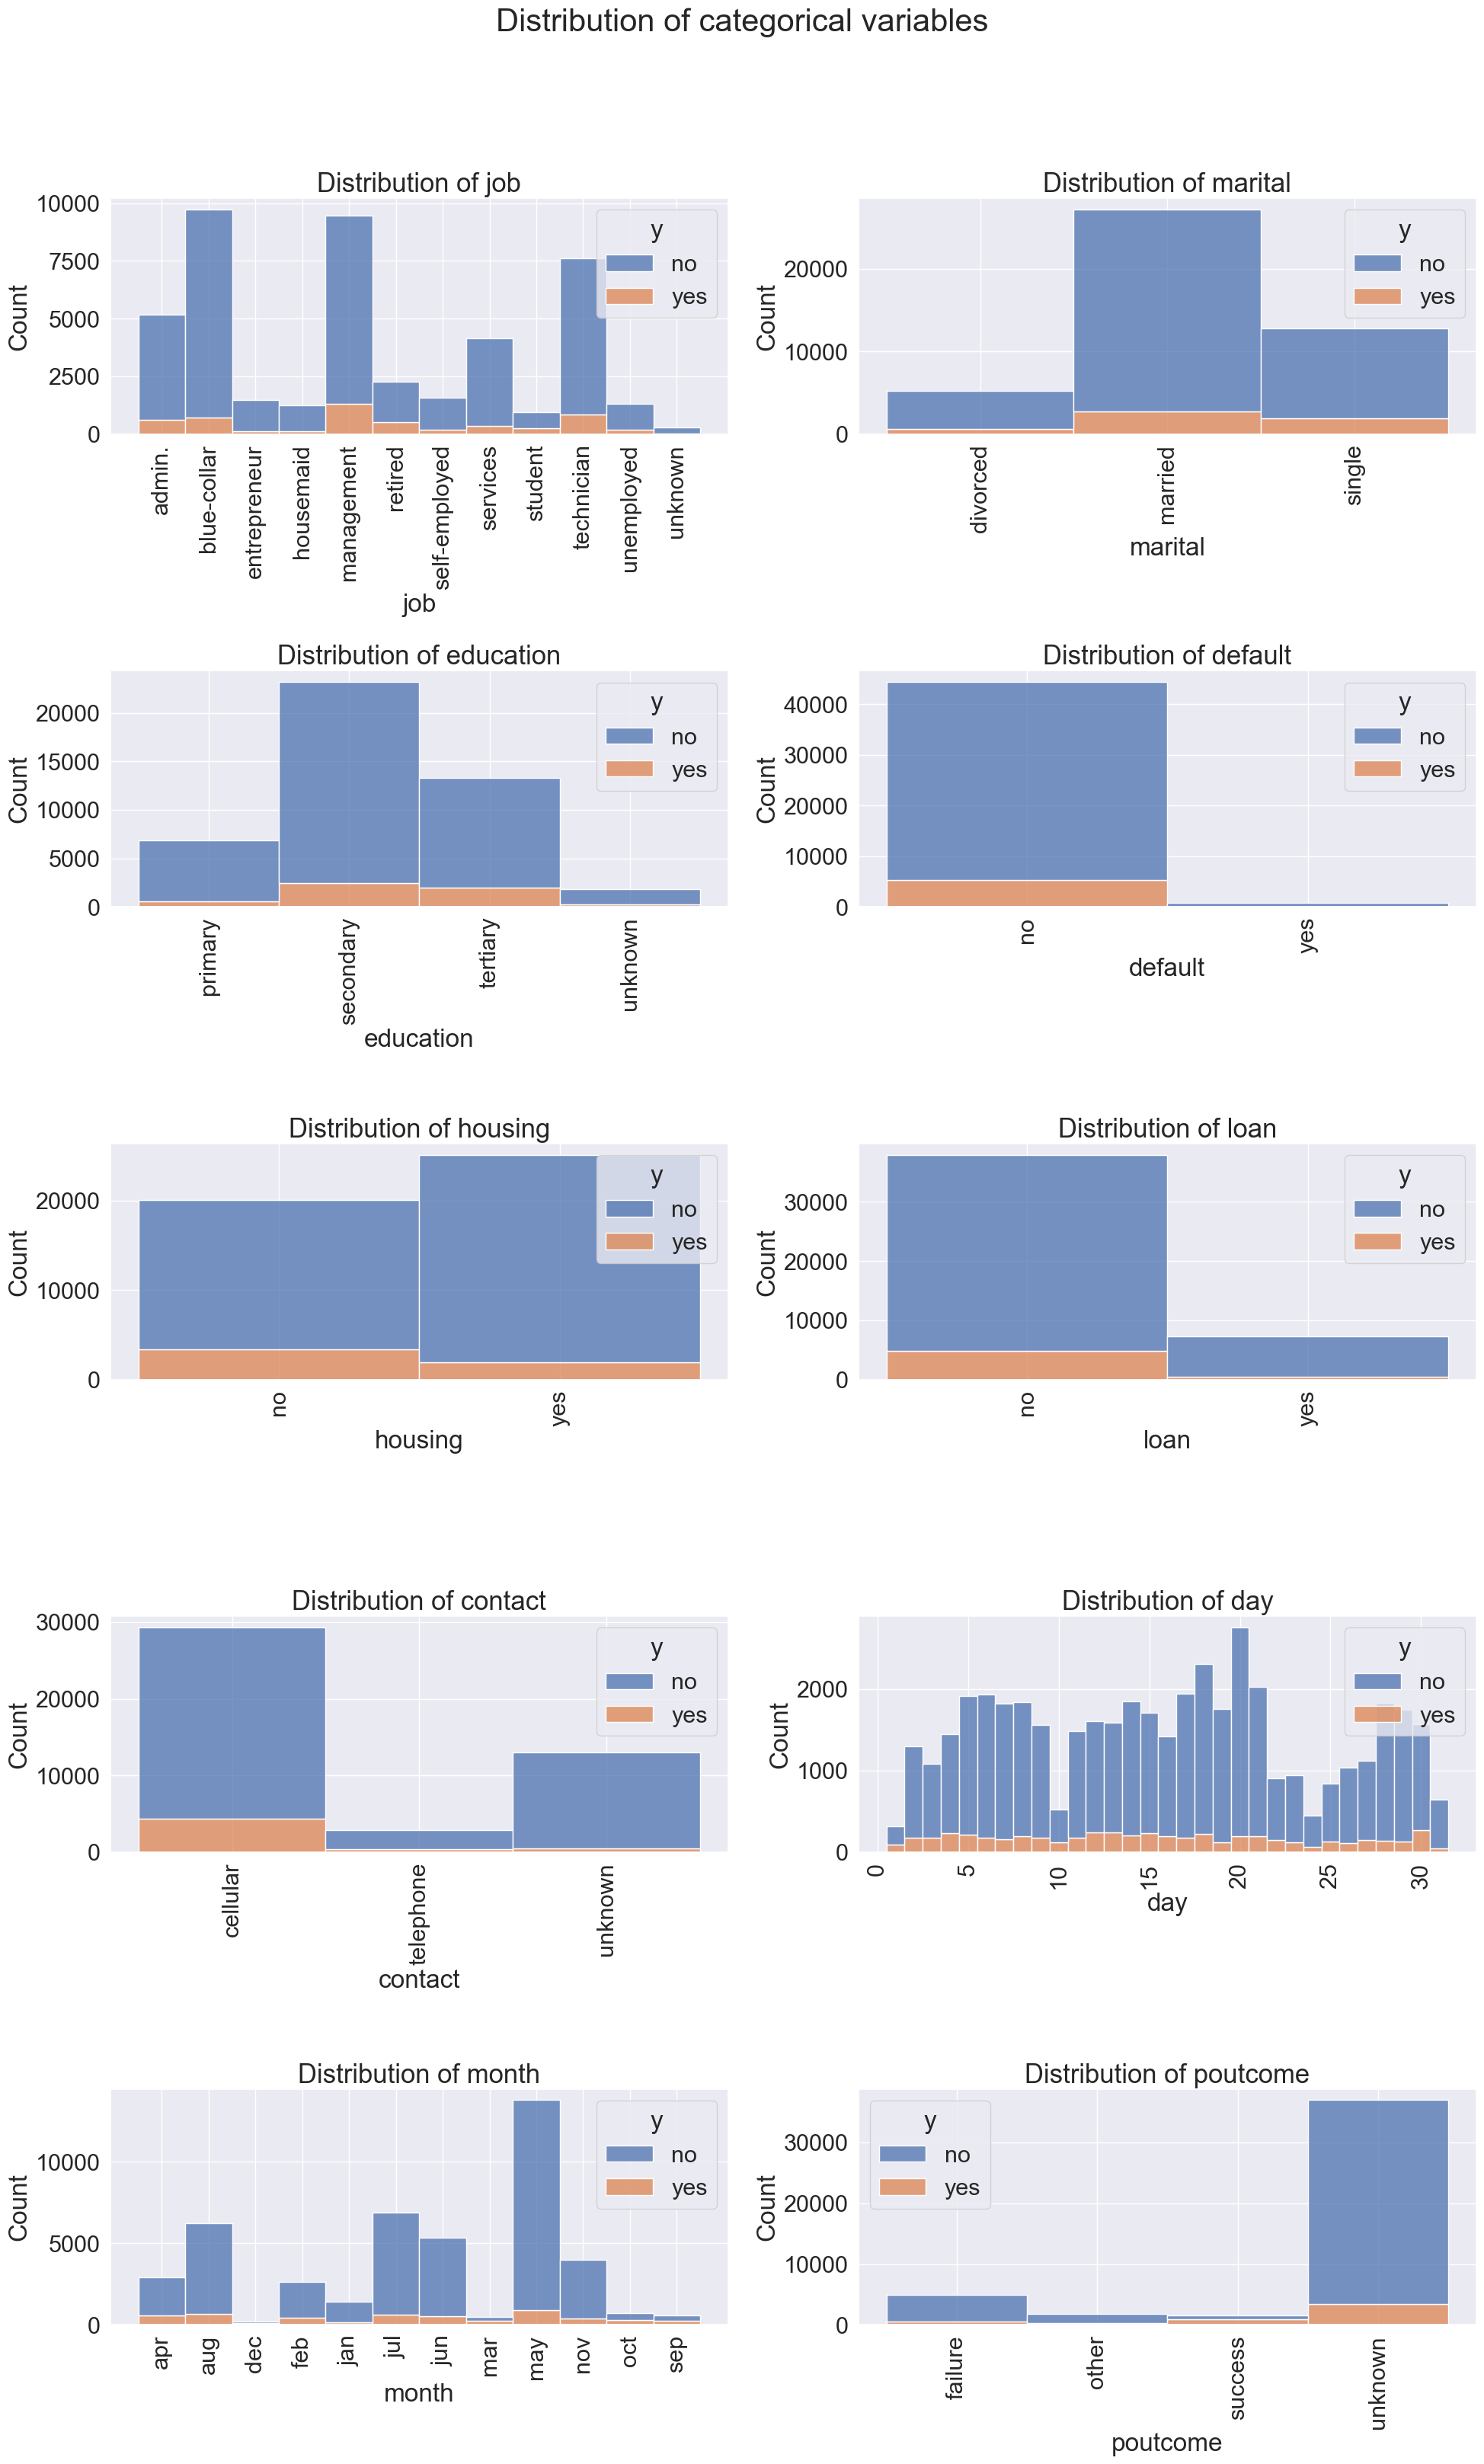

In [34]:
# Initializes a variable count with a value of 1.
count = 1
# Figsize of subplot
plt.subplots(figsize = (20,60))
# an outer for loop that iterates through the first set of categorical variables
for i in cat1:
# an inner for loop nested inside the outer loop, which iterates through the second set of categorical variables
    for j in cat2:
# specifies the current subplot location in a 10x2 grid of subplots.
        plt.subplot(10,2,count)
# Get current axis
        ax = plt.gca()
# sets the font scale for the Seaborn plots
        sns.set(font_scale = 2)
# To plot histoplot
        sns.histplot(data = bank_mrkting, x=bank_mrkting[i], hue=bank_mrkting[j],multiple = 'stack')
# Rotate x axis ticks 
        plt.xticks(rotation = 90)
# Title to each plot
        ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increments the count variable to move to the next subplot.
    count += 1
# adjusts the spacing between subplots for a better layout.
    plt.tight_layout()
# To set main title
plt.suptitle('Distribution of categorical variables', y=1.03, fontsize = 30)
# Show plot
plt.show()
        

**Observations :**<br>
**Categorical Vs y :**<br>
* Job : clients which are Management, technician and Blue Collar have more subscribed to term deposit.
* Marital : Married clients have  more subscribed to term deposit.
* Education : Secondary educated clients have more subscribed to term deposit.
* Default : By default who doesn't have more subscribed to term deposit.
* Housing : Most no of clients having no house loan have more subscribed to term deposit.
* Loan : Most no of clients doesn't have personal  loan have more subscribed to term deposit.
* Contact : Most no of clients having Cellular contact have more subscribed to term deposit.
* Day : No of clients come on 30, 18, 12, 13  day have more subscribed to term deposit.
* Month : No of clients come on May, July and August month have more subscribed to term deposit.
* Poutcome : Clients Unknown which are  in this current campaigns have more subscribed to term deposit.

# Campaign 1 Visualization

In [35]:
# 'unknown' values are missing for campaign 1 so not add in campaign_1
campaign_1 = bank_mrkting[bank_mrkting.poutcome != 'unknown']
# 'unknown' for campaign 2 so add in campaign_2
campaign_2 = bank_mrkting[bank_mrkting.poutcome == 'unknown']

### Categorical Variables

In [36]:
# List of categorical variables
cat3 = ['job','marital','education','default','housing','loan','contact','day','month']

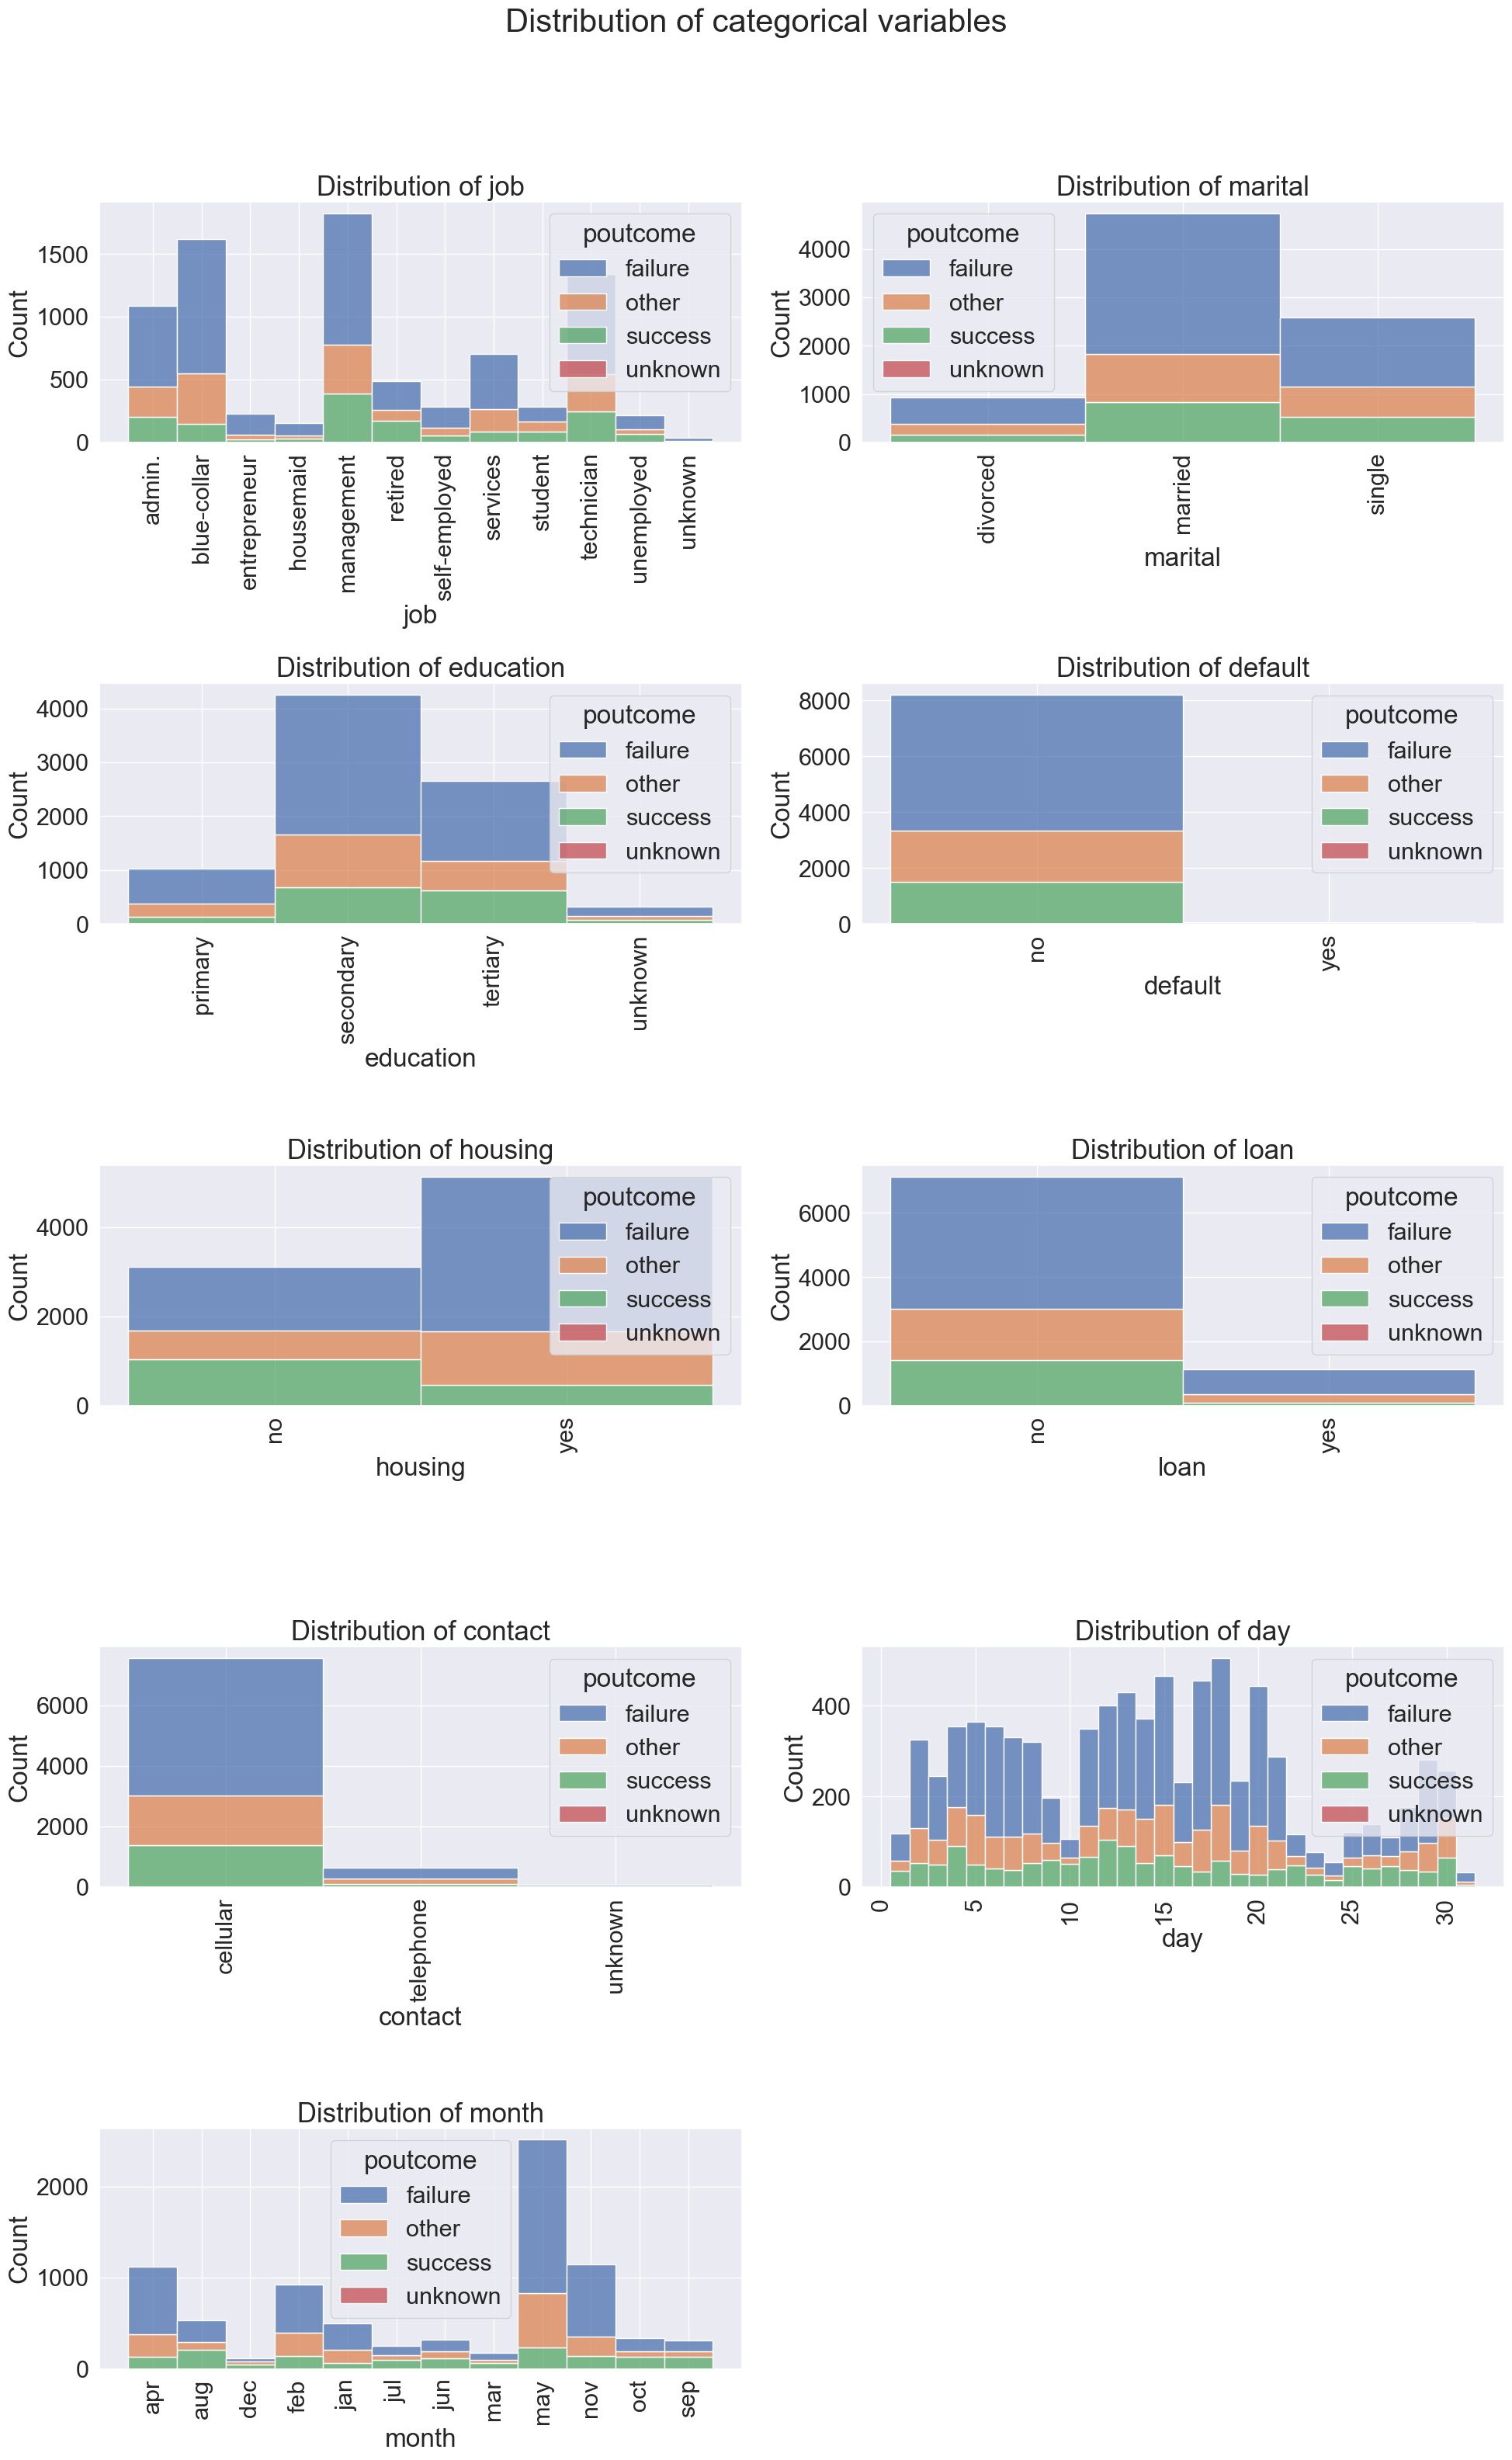

In [37]:
# Initialising the varible count with value 1.
count = 1
# Figsize for subplot
plt.subplots(figsize = (20,60))
# for loop to get subplot
for i in cat3:
# specifies the current subplot location in 10x2 grid of subplot
    plt.subplot(10,2,count)
# Get the current axis
    ax = plt.gca()
# sets the font scale for the Seaborn plots
    sns.set(font_scale = 2)
# To plot histogram
    sns.histplot(data = campaign_1, x=campaign_1[i], hue='poutcome', multiple = 'stack')
# Rotate x axis tick
    plt.xticks(rotation = 90)
# Set title for each plot
    ax.set_title('Distribution of %s'%(i), fontsize=25)
# Increament variable count to next subplot
    count += 1 
# Adjust the spacing between subplot for a better view
    plt.tight_layout()
# Set main title
plt.suptitle('Distribution of categorical variables', y=1.03, fontsize = 30)
# show plot
plt.show()

**Observations :**<br>
**Campaign 1 :**<br>
* Job : clients which are Technician, Management have responded positively.
* Marital : Married clients have  responded well.
* Education : Secondary educated clients have responded positively.
* Default : By default who doesn't have responded positively.
* Housing : Most no of clients having no house loan have responded positively.
* Loan : Most no of clients doesn't have personal  loan have responded positively.
* Contact : Most no of clients having Cellular contact have responded positively.
* Day : No of clients come on 12, 13  day have responded positively.
* Month : No of clients come on May month have more subscribed to term deposit.

# Numerical variables

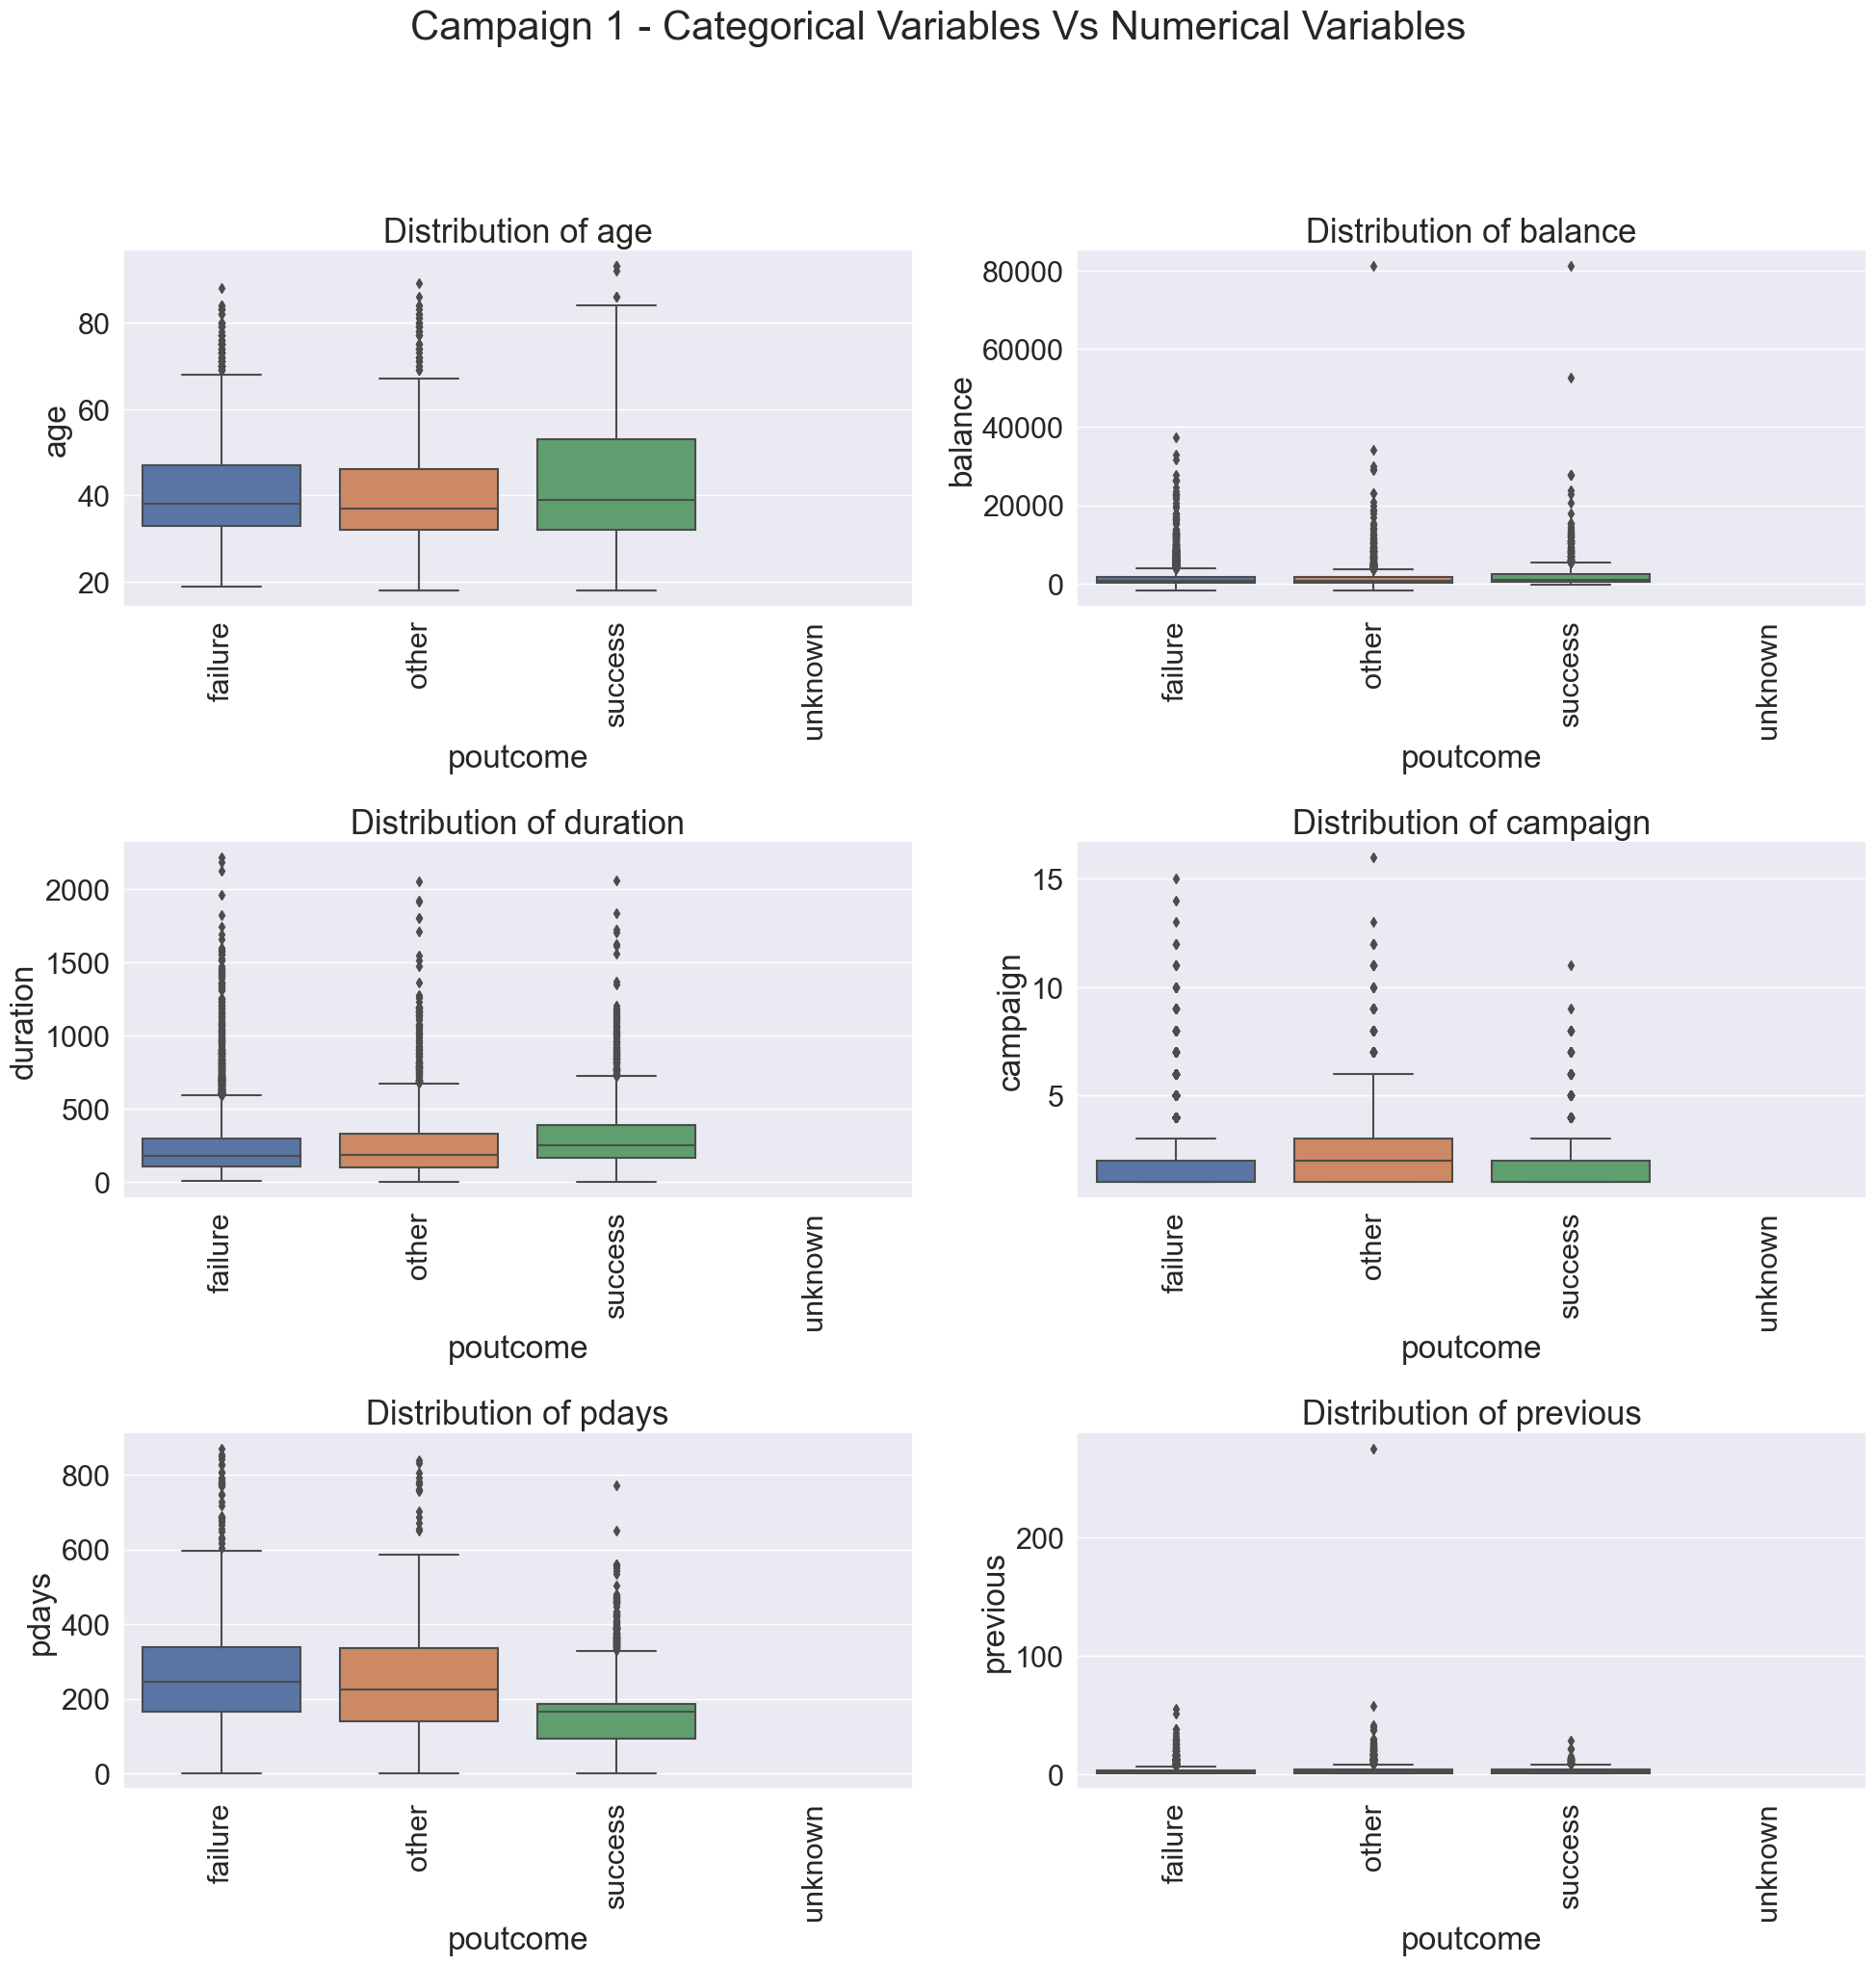

In [38]:
# Initialize the variable count with value 1
count = 1
# Set Figsize of subplot
plt.subplots(figsize =(20,60))
# For loop to get subplot
for i in nums:
# specifies the current subplot location in 10x2 grid of subplot
    plt.subplot(10,2,count)
# Get current axis
    ax = plt.gca()
# Set the font scale for seaborn plots
    sns.set(font_scale = 2)
# To plot boxplot
    sns.boxplot(x='poutcome', y=campaign_1[i], data = campaign_1)
# Rotate x axis ticks
    plt.xticks(rotation = 90)
# Set title for each title
    ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increament the count variable to get next subplot
    count += 1
# Adjust the spacing between subplot for a better view
    plt.tight_layout()
# To set main title 
plt.suptitle('Campaign 1 - Categorical Variables Vs Numerical Variables', y = 1.03, fontsize = 30)
# Show Plot
plt.show()

**Observations :**<br>
**Campaign 1 :**<br>
* Age : clients which are in large age have responded positively.
* Balance : Clients have high balance are responded well.
* Duration : Higher duration of calls  have responded positively.
* pdays : Lesser day between communication give more positive result.

# Campaign 2 Visualisation

### Categorical Variables

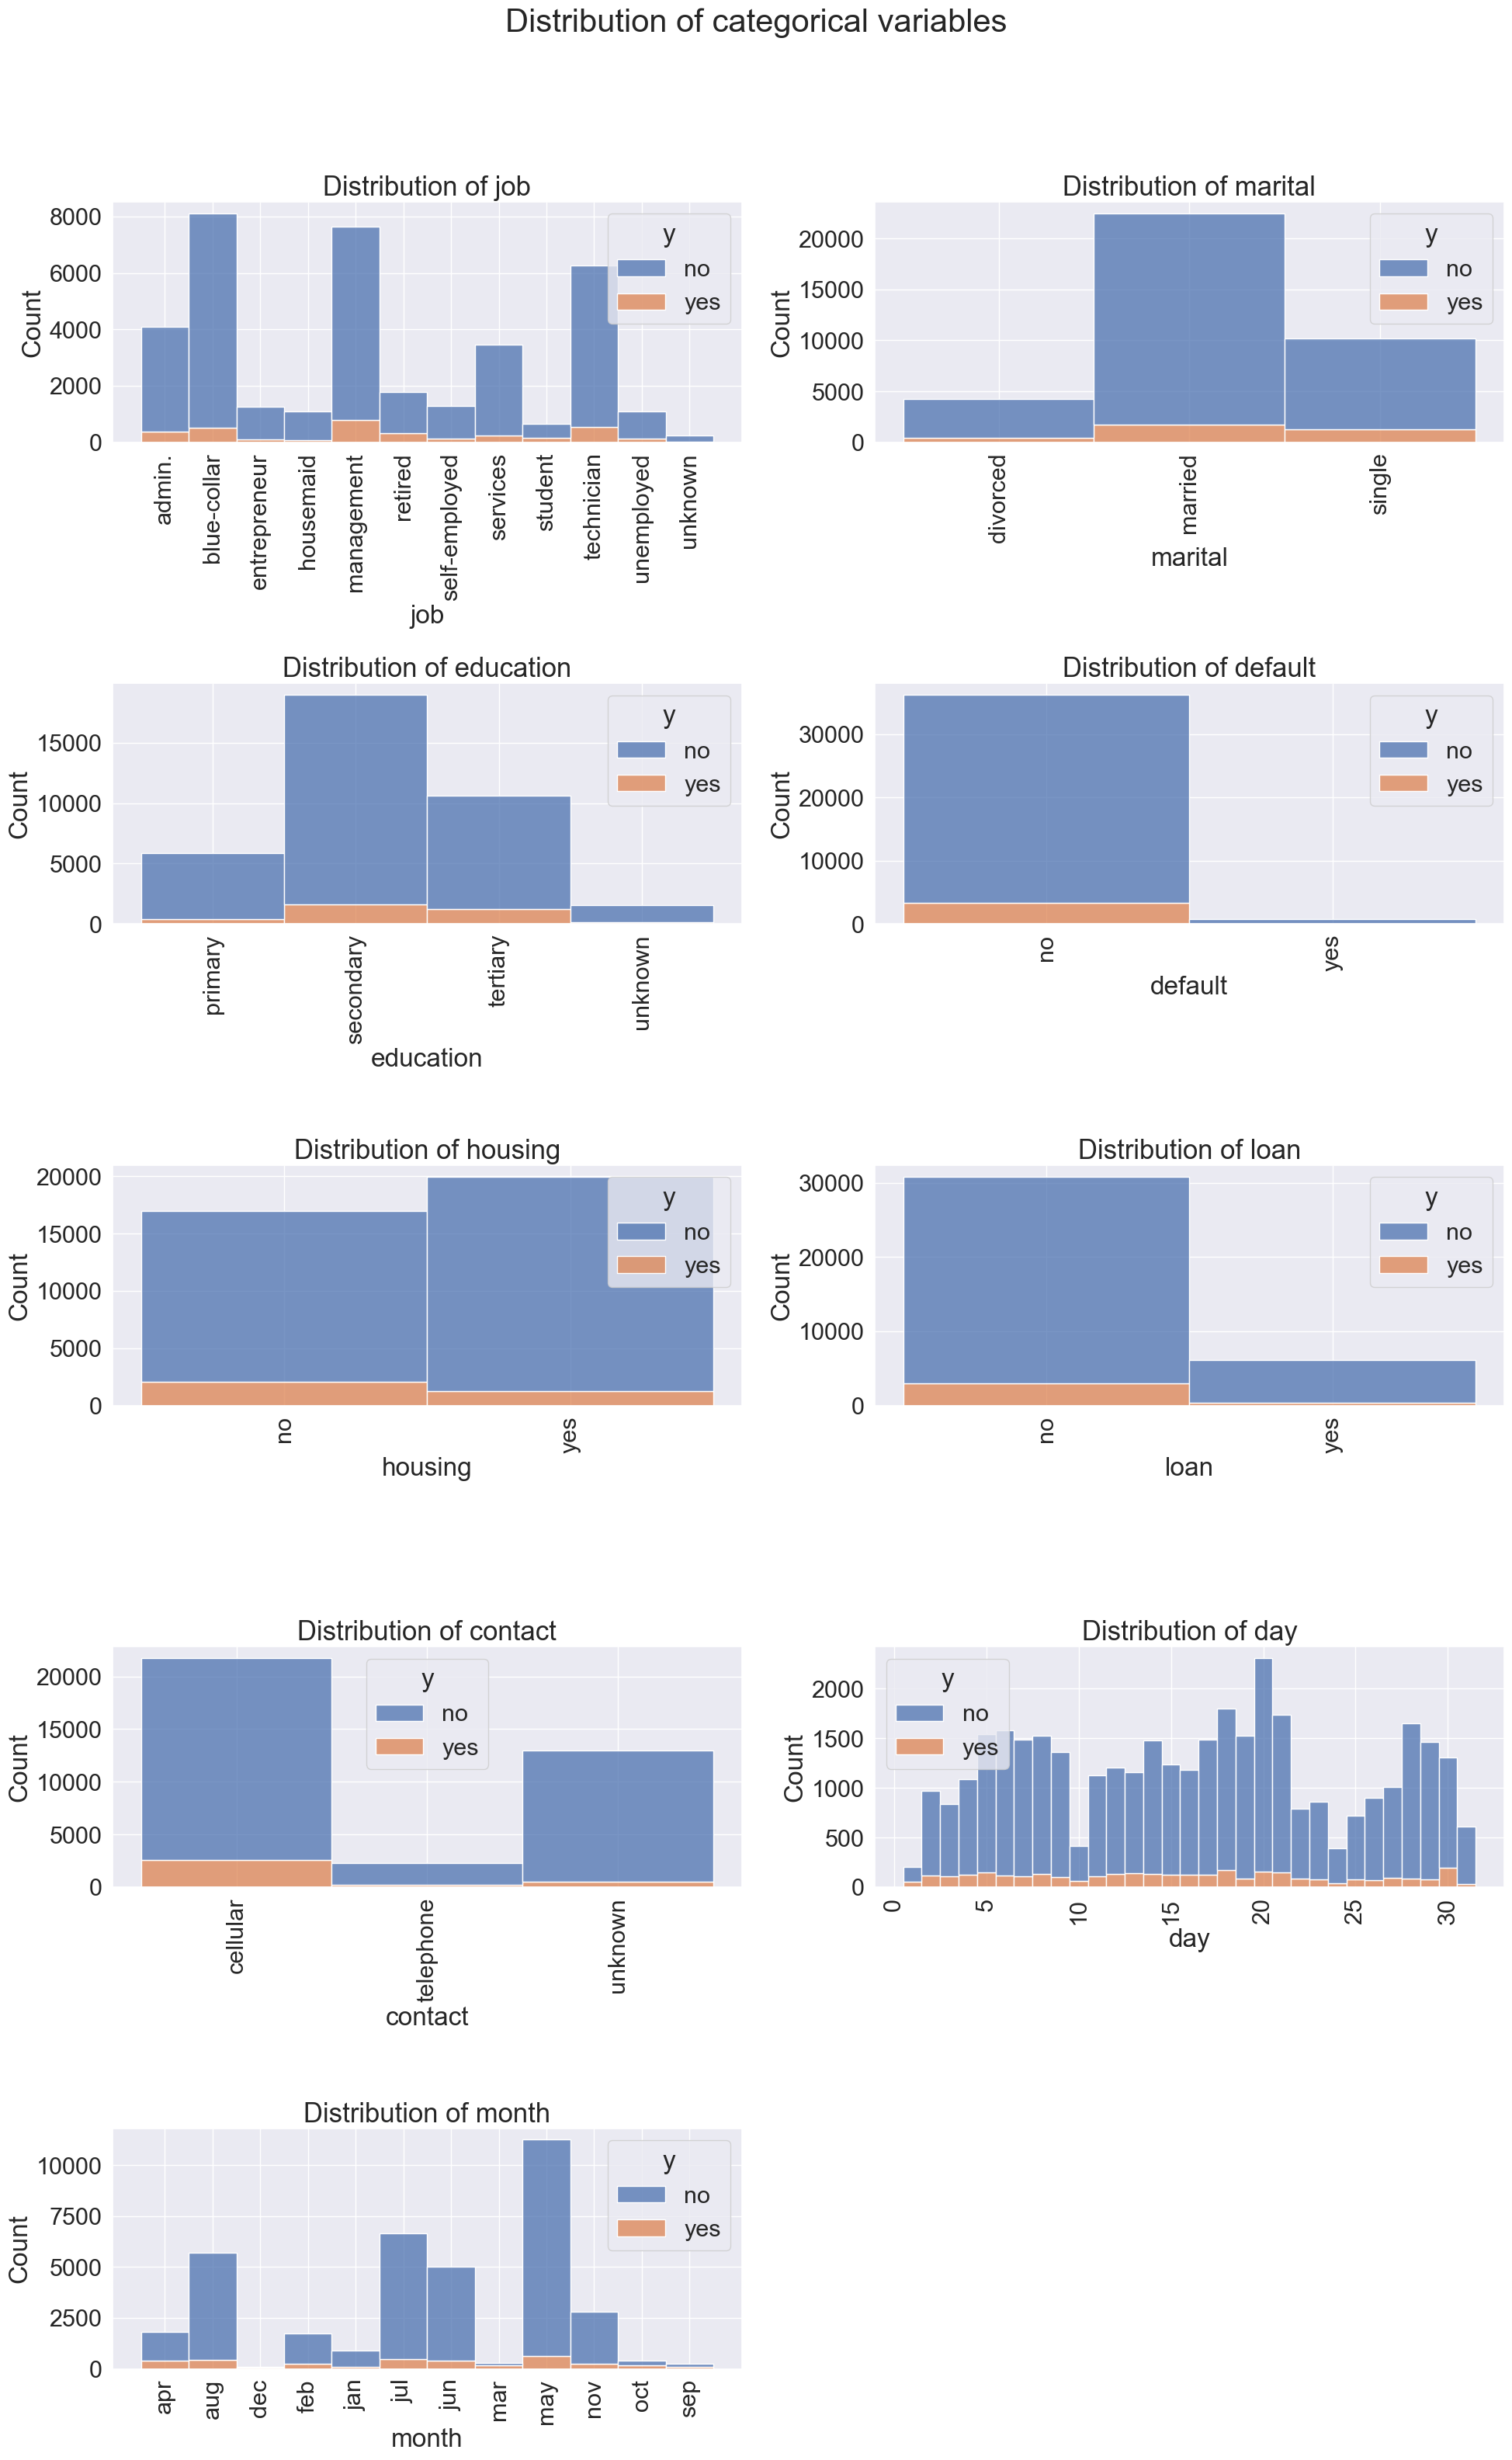

In [39]:
# Initialize variable count with value 1
count = 1
# Set Figsize of subplot
plt.subplots(figsize = (20,60))
# for loop to get subplots
for i in cat3:
# specifies the current subplot location in 10x2 grid of subplot
    plt.subplot(10,2,count)
# Get the current axis
    ax = plt.gca()
# Set the font scale for seaborn plots
    sns.set(font_scale = 2)
# To get histo plot
    sns.histplot(data = campaign_2, x = campaign_2[i], hue='y', multiple = 'stack')
# Rotate the x axis tick
    plt.xticks(rotation = 90)
# Set title to each plot
    ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increament variable to get next subplot
    count += 1
# Adjust the spacing between subplot for better view
    plt.tight_layout()
# Set Main title
plt.suptitle('Distribution of categorical variables', y=1.03, fontsize = 30)
# Show Plot
plt.show()

**Observations :**<br>
**Campaign 2 :**<br>
* Job : clients which are Technician, Management have responded positively.
* Marital : Married clients have  responded well.
* Education : Secondary educated clients have responded positively.
* Default : By default who doesn't have responded positively.
* Housing : Most no of clients having no house loan have responded positively.
* Loan : Most no of clients doesn't have personal  loan have responded positively.
* Contact : Most no of clients having Cellular contact have responded positively.
* Day : No of clients come on 18, 20  day have responded positively.
* Month : No of clients come on May month have more subscribed to term deposit.

# Numerical Variables

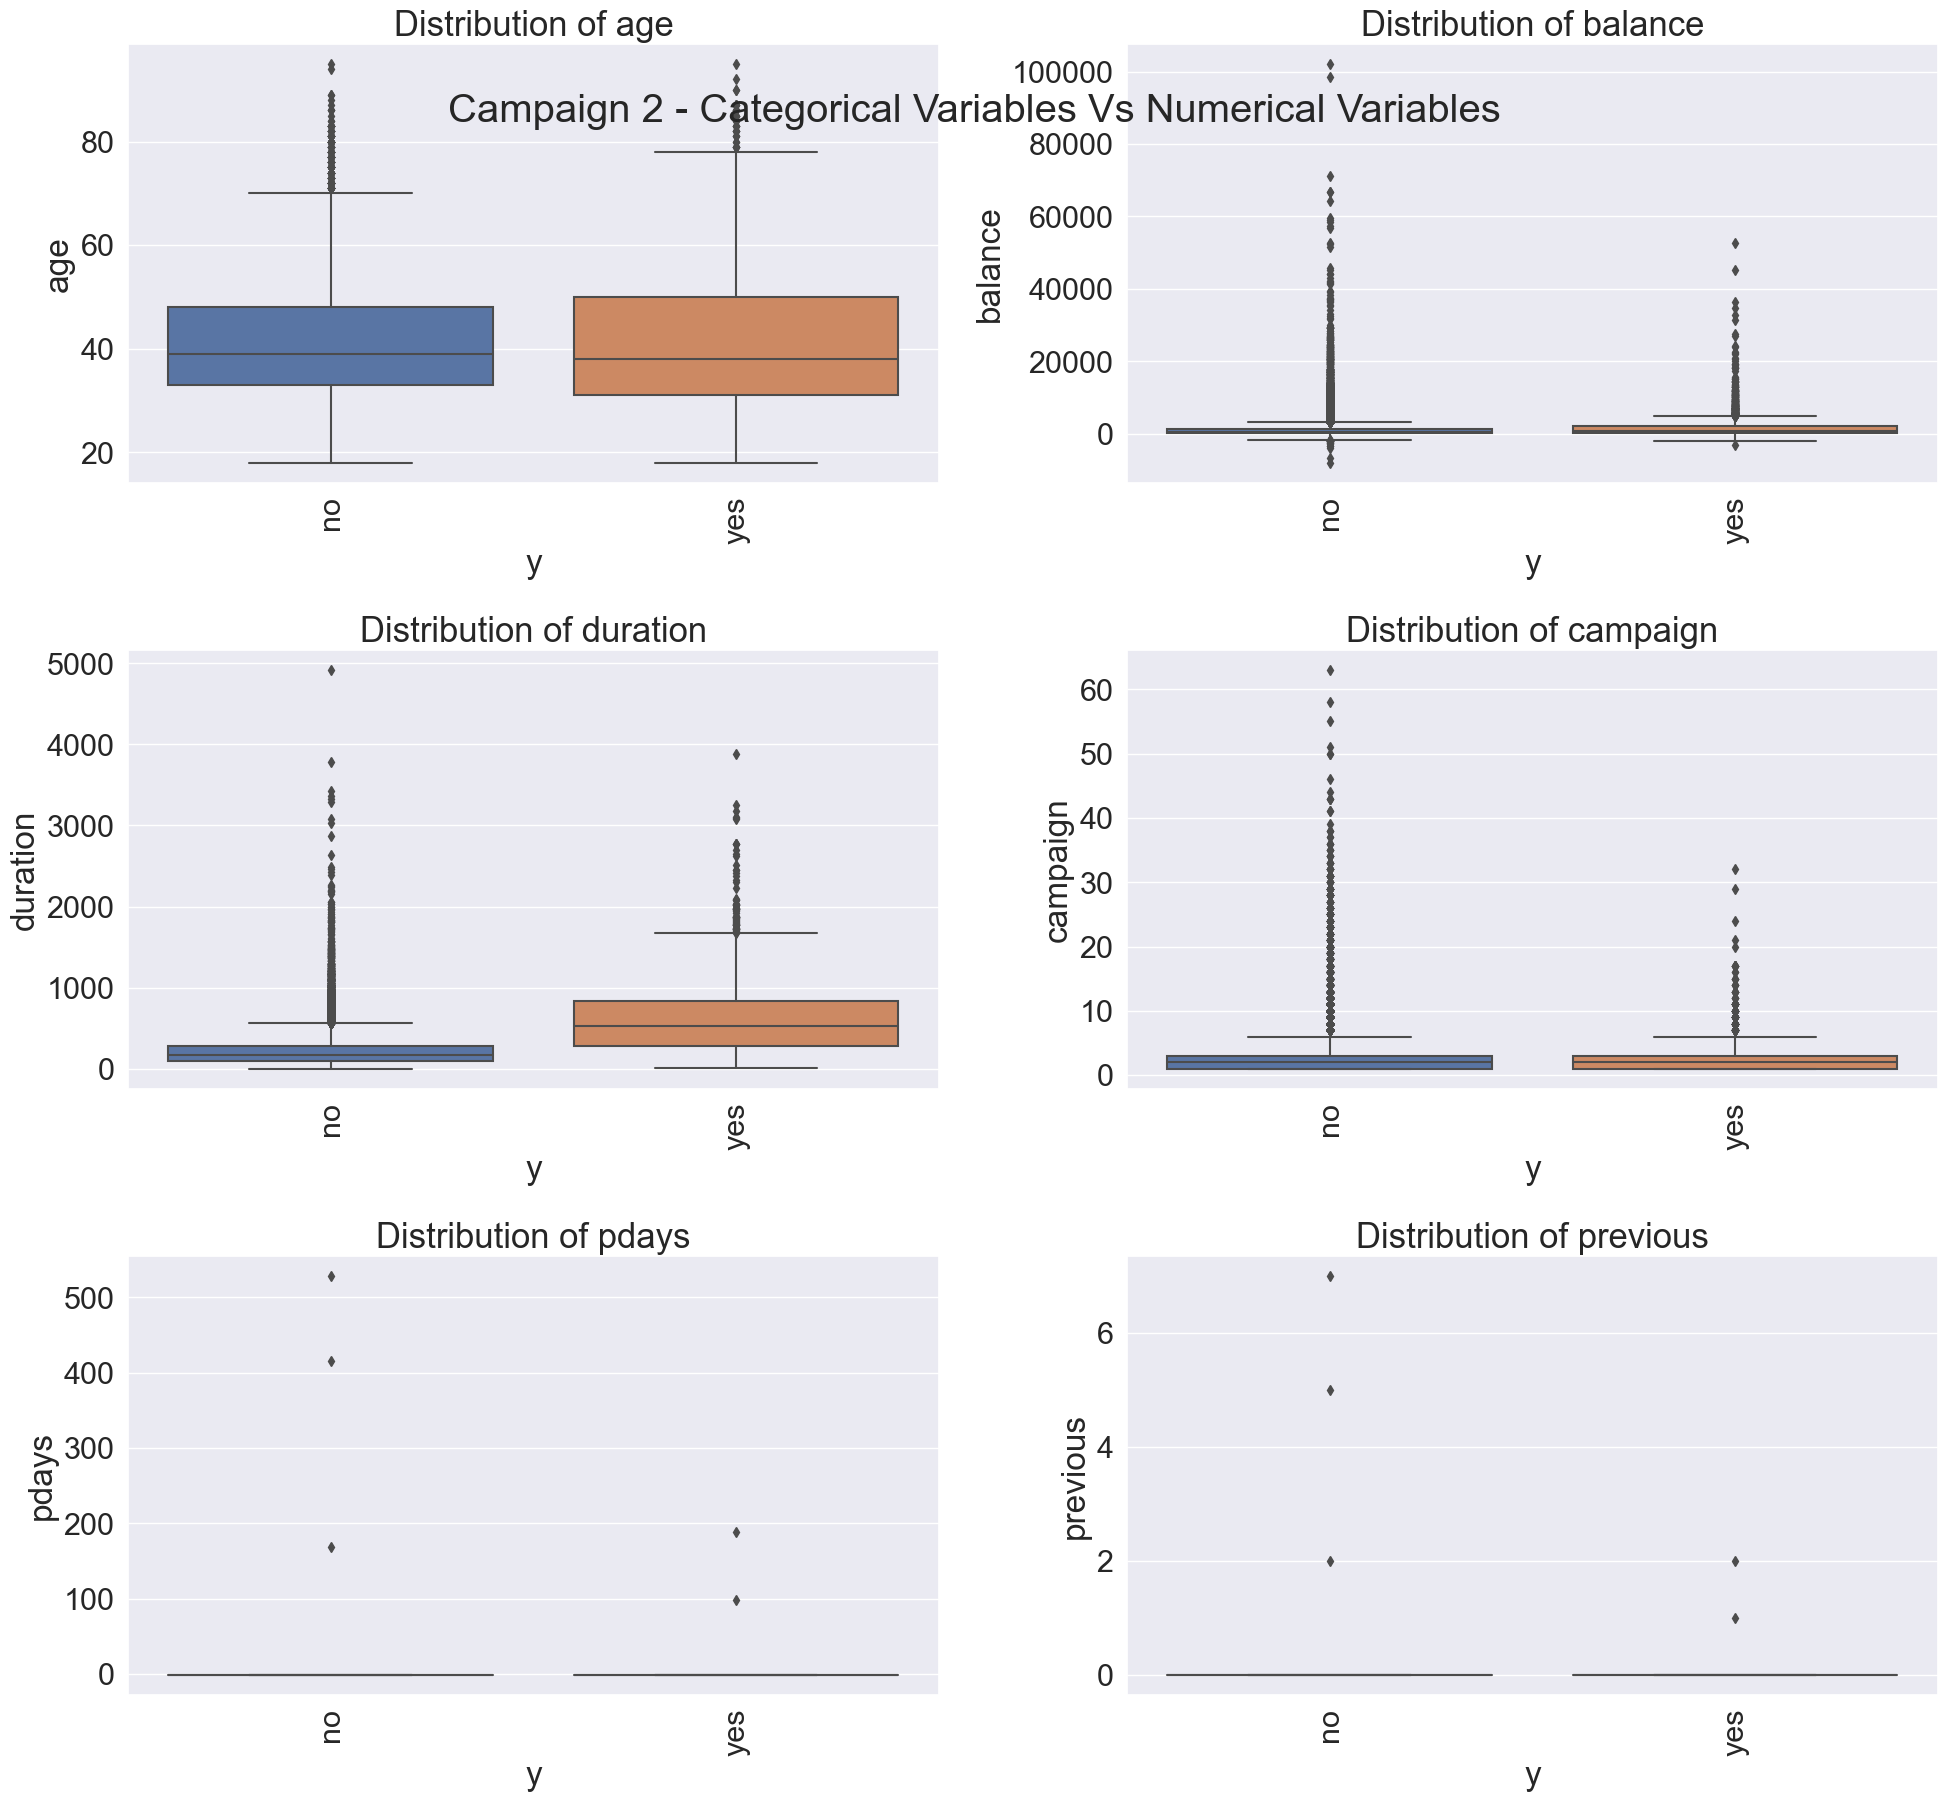

In [40]:
# Initialise variable count value as 1
count = 1
# Figsize of subplots
plt.subplots(figsize = (20,60))
# for loop to get subplots
for i in nums:
# specifies the current subplot location in 10x2 grid of subplot
    plt.subplot(10,2,count)
# To get current axis
    ax = plt.gca()
# Set the font scale for seaborn plots
    sns.set(font_scale = 2)
# To plot boxplot
    sns.boxplot(x = 'y', y = campaign_2[i], data = campaign_2)
# To rotate x axis ticks
    plt.xticks(rotation = 90)
# To set title to each plot
    ax.set_title('Distribution of %s'%(i), fontsize = 25)
# Increaent variable to get next subplot
    count += 1
# Adjust spacing between thesubplots for better view
    plt.tight_layout()
# To set main title 
plt.suptitle('Campaign 2 - Categorical Variables Vs Numerical Variables')
# Show Plot
plt.show()

**Observations :**<br>
**Campaign 2 :**<br>
* Age : clients which are in large age have responded positively.
* Balance : Clients have high balance are responded well.
* Duration : Higher duration of calls  have responded positively.

# Campaign Performance

In [41]:
# To find performance rate campaign_1
Campaign_1_performance_rate = (campaign_1.poutcome == 'success').sum()/len(campaign_1)*100
# To find performance rate campaign_2
Campaign_2_performance_rate = (campaign_2.y == 'yes').sum()/len(campaign_2)*100
print('Campaign_1_performance_rate :', Campaign_1_performance_rate)
print('Campaign_2_performance_rate :', Campaign_2_performance_rate)

Campaign_1_performance_rate : 18.310712554532234
Campaign_2_performance_rate : 9.161503287426607


**Obervation :**<br>
* Campaign 1 Performance is better than Campaign 2 Performance

# Campaign_1_failure and Campaign_2_No_Response

In [45]:
# Give campaign 1 failure with help of poutcome variable
campaign_1_failure = campaign_1[campaign_1.poutcome == 'failure']
# Give campaign 2 No Response with help of poutcome variable
campaign_2_no_response = campaign_2[campaign_2.y == 'no']

# Campaign_1_failure

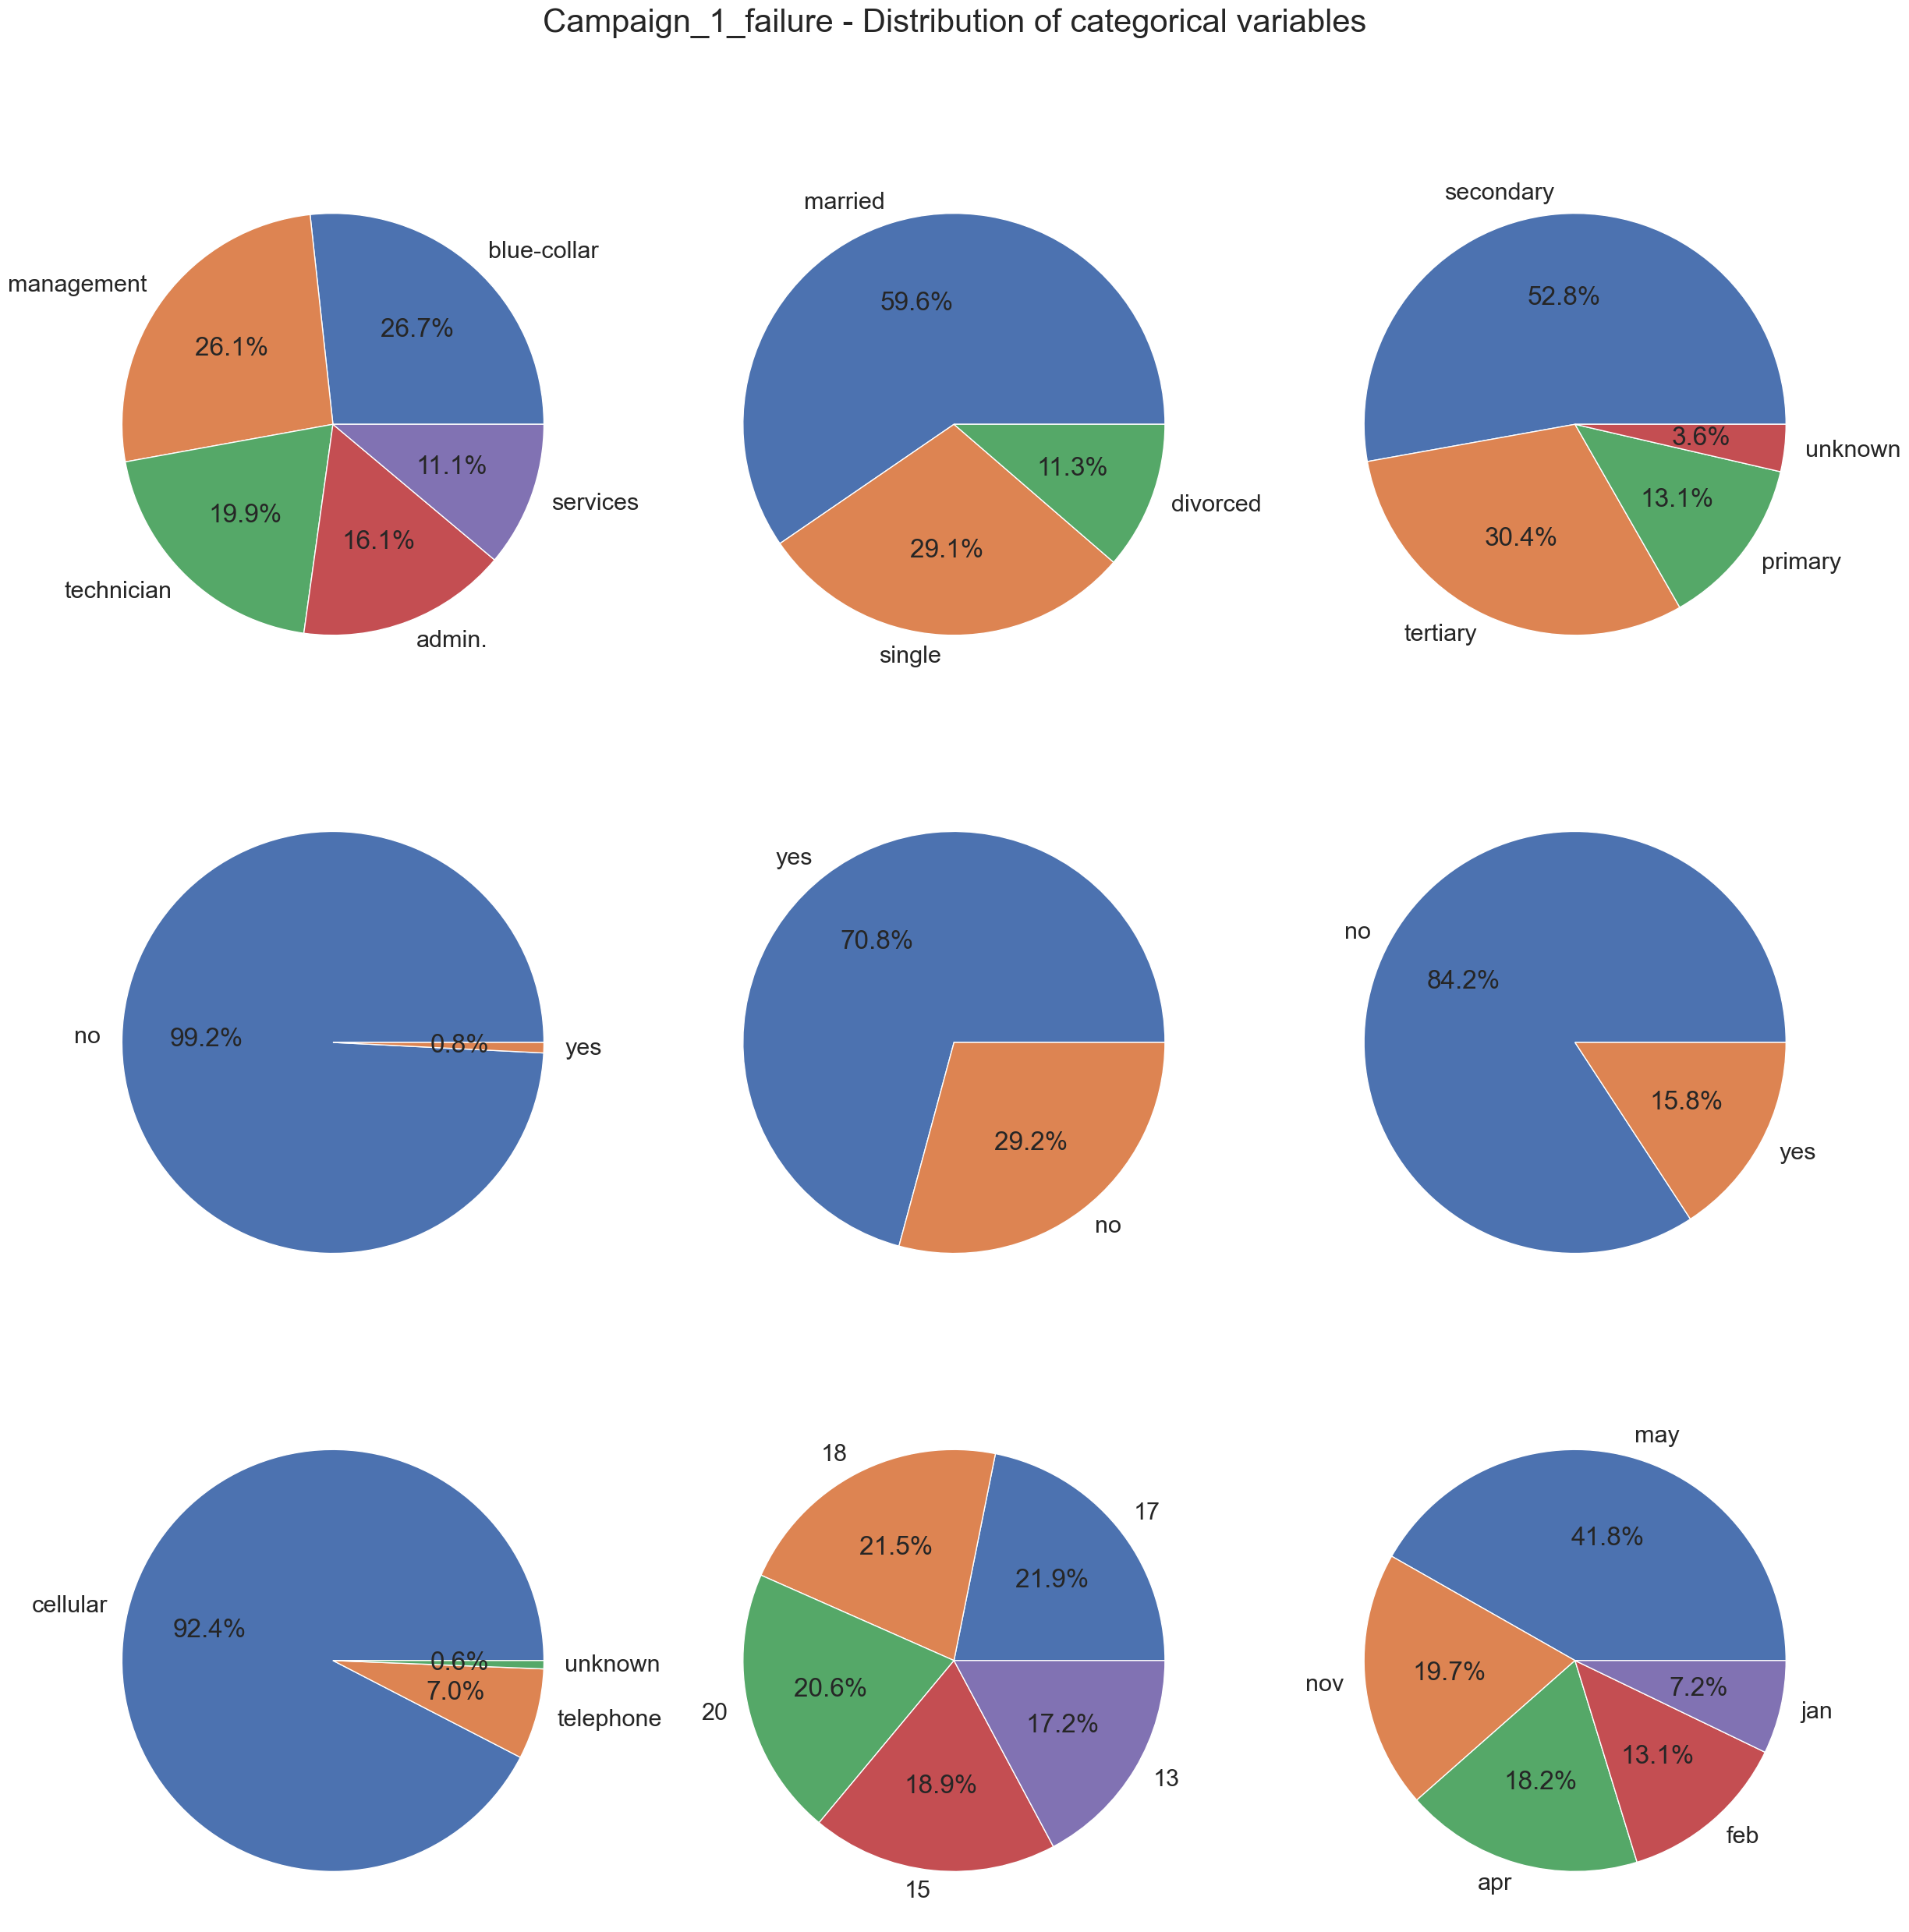

In [49]:
# Initializing the variable count as value 1 
count = 1
# Set figsize of subplot
plt.subplots(figsize = (25,40))
# For loop to set  subplot
for i in cat3 : 
# Set current plot location in a 5x3 grid of subplot
    plt.subplot(5, 3, count)
# Get current axis of subplot
    ax = plt.gca()
# Set font scale for seaborn plots
    sns.set(font_scale = 2)
# Create a pie chart for categorical variable
    plt.pie(campaign_1_failure[i].value_counts().values[:5], 
            labels = campaign_1_failure[i].value_counts().index[:5], autopct = '%1.1f%%')
# Increment variable to get next subplot
    count += 1
# Adjust the spacing between subplots to get better layout 
    plt.tight_layout()
# Set main Title
plt.suptitle('Campaign_1_failure - Distribution of categorical variables', y = 1.03, fontsize = 30)
# Show plot
plt.show()

**Observations :**<br>
**Campaign_1_Failure :**<br>

* Job : For Failure, Blue_Collar are in higher percent.
* Marital : For Failure, Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal  loan.
* Poutcome : did not participate in previous campaigns are high.
* Contact : Clients mostly have cellular contact.
* Day : Most of the days are 20, 18, 17
* Month : Most of the months are May, November, April.

### Campaign_2_no_response

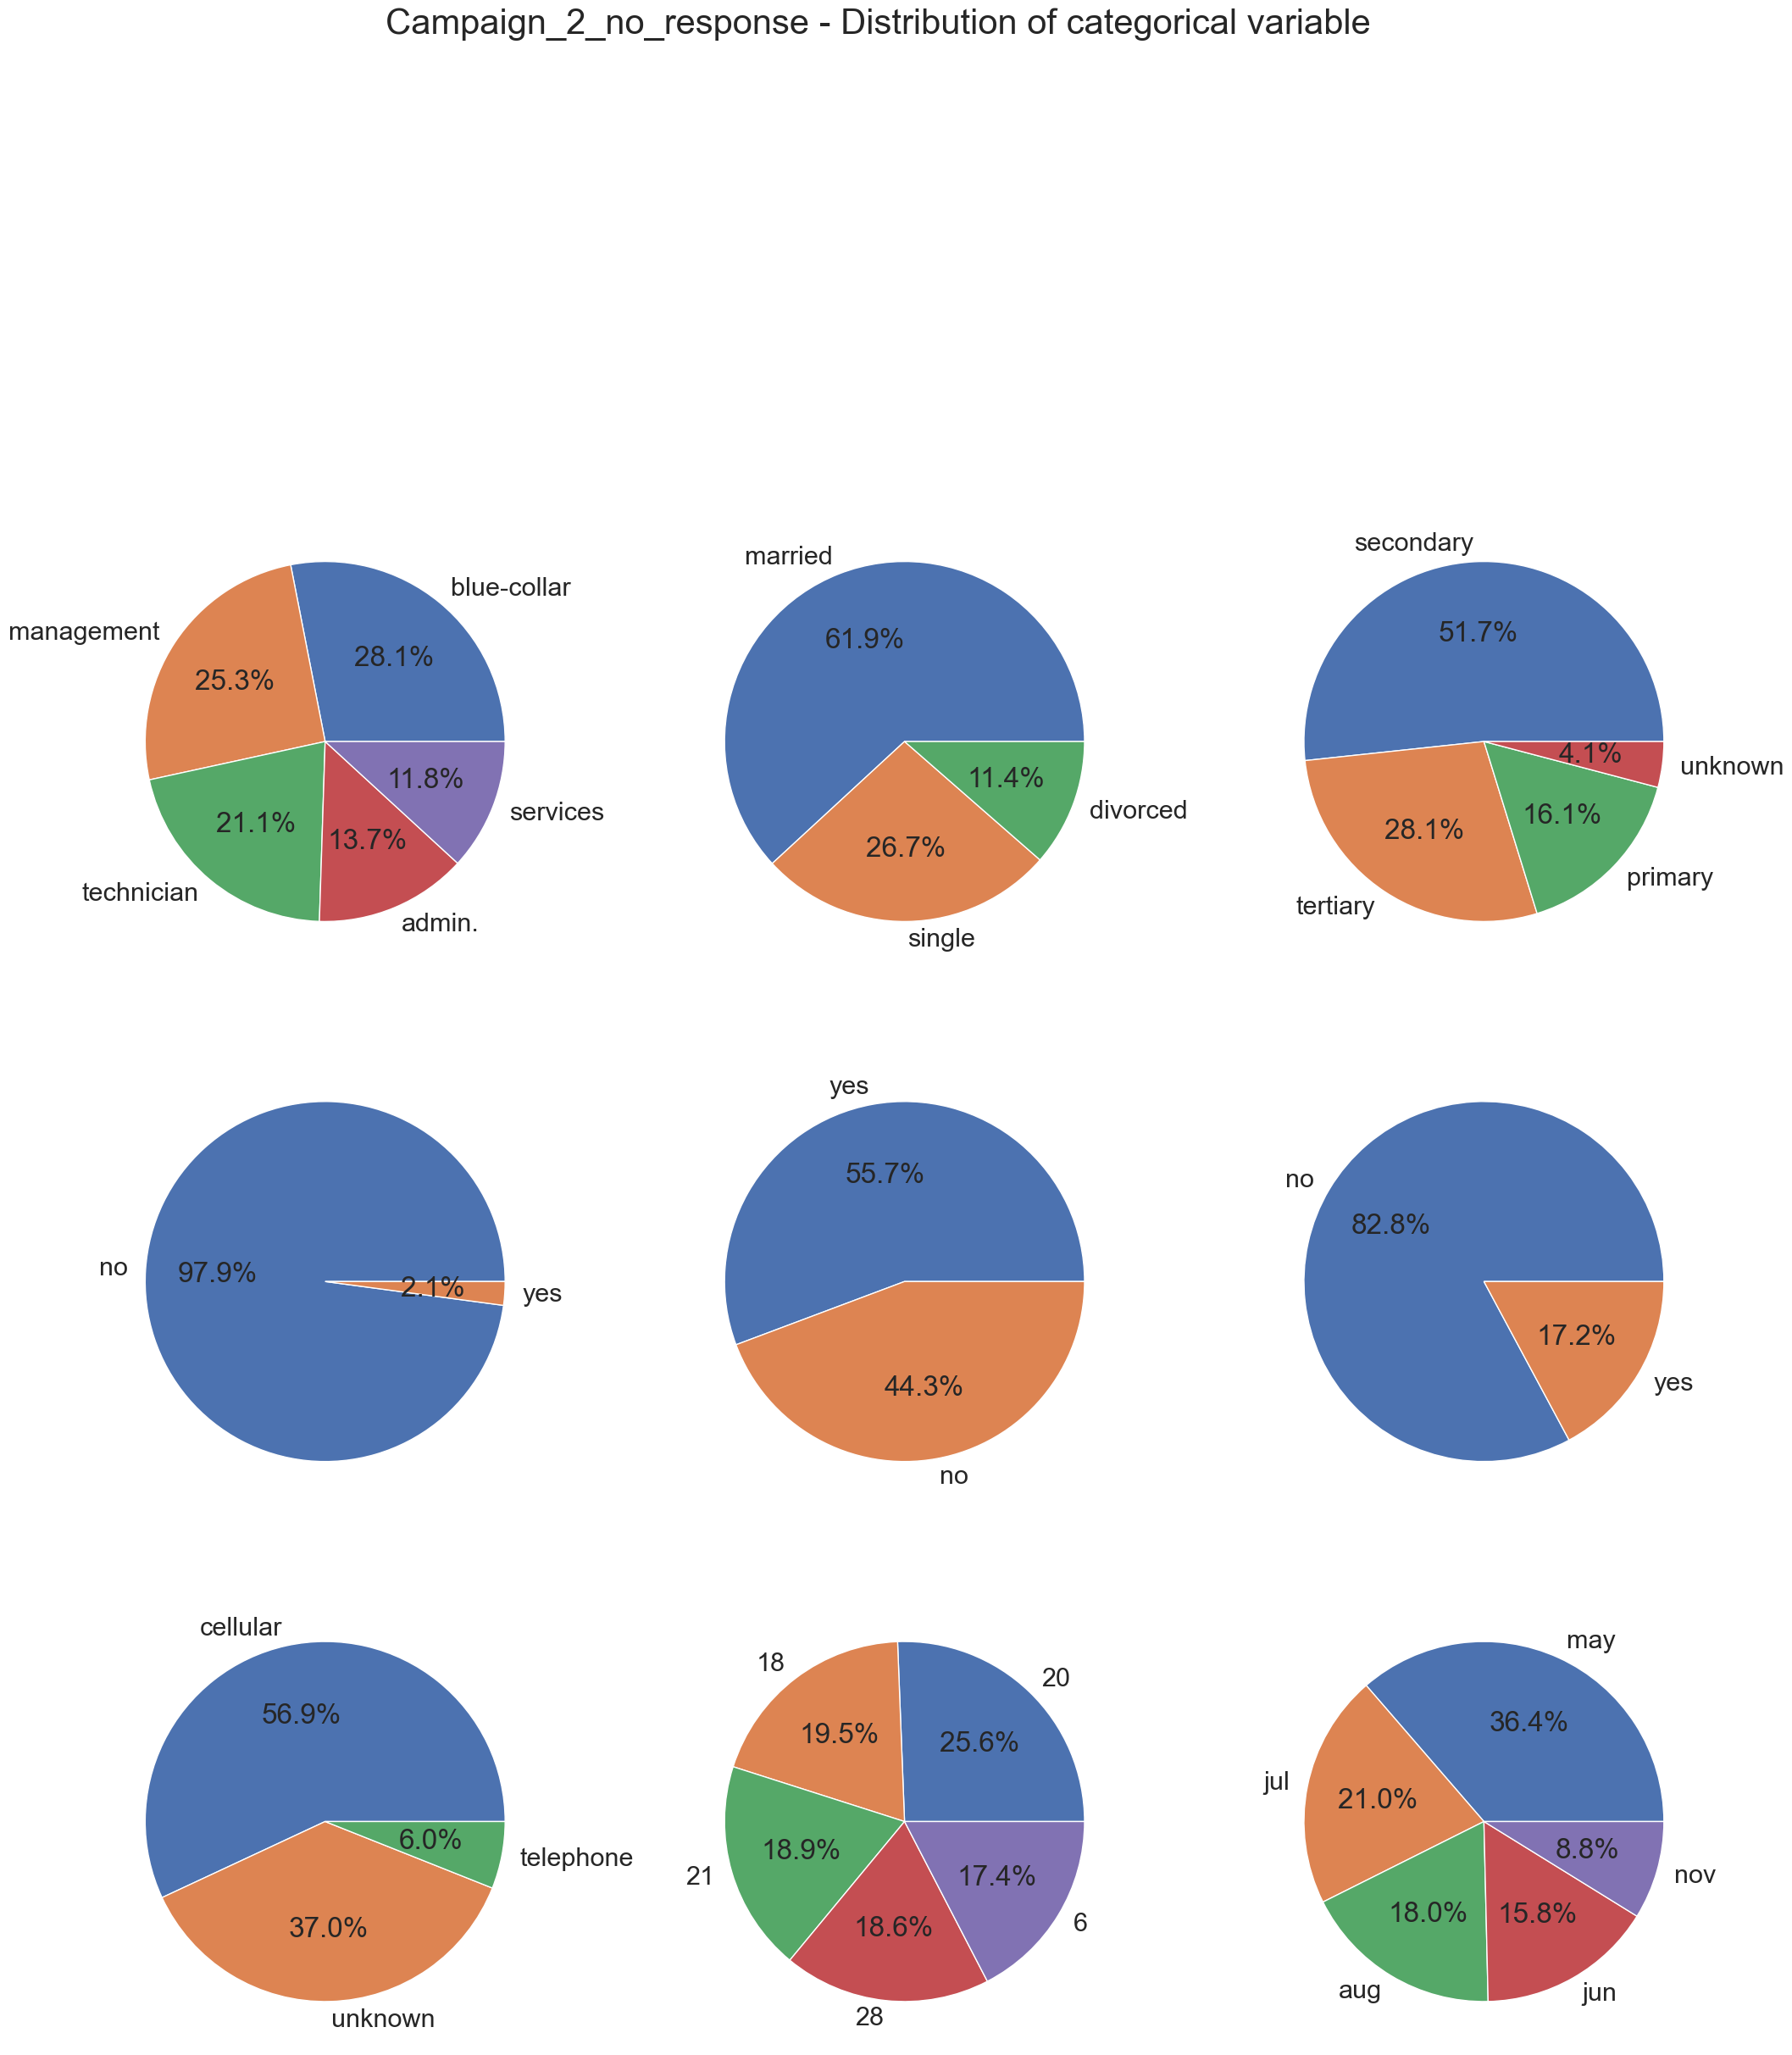

In [51]:
# Initialize the variable count a value 1
count = 1
# Set figsize for subplot
plt.subplots(figsize = (25,40))
# For loop to get subplots
for i in cat3:
# Set current plot location in 5x3 grid of subplot
    plt.subplot(5, 3, count)
# Get current axis
    ax = plt.gca()
# Set font scale for seaborn plots
    sns.set(font_scale = 2)
# Plot Pie chart for categorical variables
    plt.pie(campaign_2_no_response[i].value_counts().values[:5], labels = campaign_2_no_response[i].value_counts().index[:5], autopct = '%1.1f%%')
# Increment variable to get next subplot
    count += 1
# Adjust spacing between subplots to get better layout
# Set Main Title
plt.suptitle('Campaign_2_no_response - Distribution of categorical variable', y = 1.03, fontsize = 30)
# Show Plot
plt.show()


#### Observations:
#### Campaign_2_no_response
* Job : For Failure, Blue_Collar are in higher percent.
* Marital : For Failure, Married clients are in high number.
* Education : Secondary education clients are high.
* Default : By default who doesn't have loan are high.
* Housing : Most no of clients have house loan.
* Loan : Most no of clients doesn't have personal loan.
* Poutcome : did not participate in previous campaigns are high.
* Contact : Clients mostly have cellular contact.
* Day : Most of the days are 20, 18, 21
* Month : Most of the months are May, July, August.

# Conclusion :

| |campaign_1_success     | campaign_1_failure   | 
|---:|:-----------|:------|
| 1 | Job : clients which are Technician, Management have responded positively.      |Job : For Failure, Blue_Collar are in higher percent.   | 
| 2 | Marital : Married clients have  responded well.   |Marital : For Failure, Married clients are in high number.  | 
| 3 | Education : Secondary educated clients have responded positively.   |Education : Secondary education clients are high.    |
| 4 | Default : By default who doesn't have responded positively.   |Default : By default who doesn't have loan are high.    | 
| 5 | Housing : Most no of clients having no house loan have responded positively.    |Housing : Most no of clients have house loan.   | 
| 6 | Loan : Most no of clients doesn't have personal  loan have responded positively.    |Loan : Most no of clients doesn't have personal  loan.    | 
| 7 | Contact : Most no of clients having Cellular contact have responded positively.    |Contact : Clients mostly have cellular contact.     | 
| 8 | Day : No of clients come on 12, 13  day have responded positively.   |Day : Most of the days are 20, 18, 17    | 
| 9 | Month : No of clients come on May month have more subscribed to term deposit.     |Month : Most of the months are May, November, April.    | 
| 10 | Age : clients which are in large age have responded positively.    |Poutcome : did not participate in previous campaigns are high.   | 
| 11 | Balance : Clients have high balance are responded well.    |   | 
| 12 | Duration : Higher duration of calls  have responded positively.    |  | 
| 13 | pdays : Lesser day between communication give more positive result.    |  |




| |campaign_2_response     | campaign_2_no_response   | 
|---:|:-----------|:------|
| 1 | Job : clients which are Technician, Management have responded positively.      |Job : For Failure, Blue_Collar are in higher percent.   | 
| 2 | Marital : Married clients have  responded well.   |Marital : For Failure, Married clients are in high number.  | 
| 3 | Education : Secondary educated clients have responded positively.   |Education : Secondary education clients are high.    |
| 4 | Default : By default who doesn't have responded positively.   |Default : By default who doesn't have loan are high.    | 
| 5 | Housing : Most no of clients having no house loan have responded positively.    |Housing : Most no of clients have house loan.   | 
| 6 | Loan : Most no of clients doesn't have personal  loan have responded positively.    |Loan : Most no of clients doesn't have personal  loan.    | 
| 7 | Contact : Most no of clients having Cellular contact have responded positively.    |Contact : Clients mostly have cellular contact.     | 
| 8 | Day : No of clients come on 18, 20  day have responded positively.   |Day : Most of the days are 20, 18, 21    | 
| 9 | Month : No of clients come on May month have more subscribed to term deposit.     |Month : Most of the months are May, July, August.    | 
| 10 | Age : clients which are in large age have responded positively.    |Poutcome : did not participate in previous campaigns are high.   | 
| 11 | Balance : Clients have high balance are responded well.    |   | 
| 12 | Duration : Higher duration of calls  have responded positively.    |  | 





Some numericals features are not normally distributed even after applying transformations. Thus we have to go for non-      parametric approach in machine learning(ML).

